__The S&P 500, or just the S&P, is an American stock market index based on the market capitalizations of 500 large companies having common stock listed on the NYSE, NASDAQ, or the Cboe BZX Exchange.__<br> In our data, there are columns: Date, S&P500 and all 500 stocks based on which S&P500 is decided
<br>Ref link: https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877

In [66]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [67]:
#Import data
df=pd.read_csv("Data\ML_FIN\data_stocks.csv")

#Drop the date variable
df=df.drop(['DATE'],1)

#Dimensions of dataset
n=df.shape[0]
p=df.shape[1]

#Make data a numpy array
data=df.values

In [68]:
data.shape

(41266, 501)

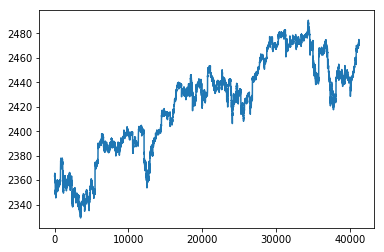

In [69]:
plt.plot(df['SP500'])

In [70]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [71]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_train=scaler.fit_transform(data_train)  
data_test=scaler.transform(data_test) 
#Note that scaler.fit_transform is being used for training data while transform for test data.

#Build X and Y
X_train=data_train[:,1:]
y_train=data_train[:,0]
X_test=data_test[:,1:]
y_test=data_test[:,0]

In [72]:
#Import Tensorflow
import tensorflow as tf
n_stocks=X_train.shape[1]
X=tf.placeholder(dtype=tf.float32,shape=[None,n_stocks])
Y=tf.placeholder(dtype=tf.float32,shape=[None])

In [73]:
n_stocks

500

In [74]:
# Model architecture parameters
n_neurons_1=1024
n_neurons_2=512
n_neurons_3=256
n_neurons_4=128
n_target=1

In [75]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [76]:
#CREATING VARIABLES

# Layer 1: Variables for hidden weights and biases
W_hidden_1=tf.Variable(weight_initializer([n_stocks,n_neurons_1]))
bias_hidden_1=tf.Variable(bias_initializer([n_neurons_1]))

# Layer 2: Variables for hidden weights and biases
W_hidden_2=tf.Variable(weight_initializer([n_neurons_1,n_neurons_2]))
bias_hidden_2=tf.Variable(bias_initializer([n_neurons_2]))

# Layer 3: Variables for hidden weights and biases
W_hidden_3=tf.Variable(weight_initializer([n_neurons_2,n_neurons_3]))
bias_hidden_3=tf.Variable(bias_initializer([n_neurons_3]))

# Layer 4: Variables for hidden weights and biases
W_hidden_4=tf.Variable(weight_initializer([n_neurons_3,n_neurons_4]))
bias_hidden_4=tf.Variable(bias_initializer([n_neurons_4]))

# Output Layer: Variables for hidden weights and biases
W_out=tf.Variable(weight_initializer([n_neurons_4,n_target]))
bias_out=tf.Variable(bias_initializer([n_target]))

In [77]:
#Designing the network architecture

#Here we are multiplying the previous layer with current layer weights to get the current layer. Then we add bias.
#Then we use activation function relu

#Hidden Layer
hidden_1=tf.nn.relu(tf.add(tf.matmul(X,W_hidden_1),bias_hidden_1))
hidden_2=tf.nn.relu(tf.add(tf.matmul(hidden_1,W_hidden_2),bias_hidden_2))
hidden_3=tf.nn.relu(tf.add(tf.matmul(hidden_2,W_hidden_3),bias_hidden_3))
hidden_4=tf.nn.relu(tf.add(tf.matmul(hidden_3,W_hidden_4),bias_hidden_4))

# Output layer (must be transposed). NOTE: No activation function being used here because it is a regression problem
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))


In [125]:
#Cost function
mse=tf.reduce_mean(tf.squared_difference(out,Y))

In [126]:
#Optimizer
opt=tf.train.AdamOptimizer().minimize(mse)

In [127]:
#Make Session
net=tf.Session()

#Run Initializer
net.run(tf.global_variables_initializer())

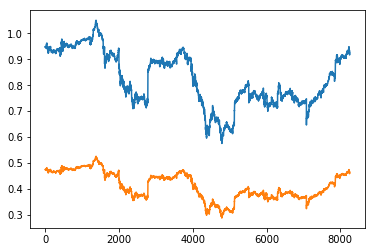

In [97]:


#Setup interactive plot
plt.ion()
fig=plt.figure()
ax1=fig.add_subplot(111)
line1,=ax1.plot(y_test)
line2,=ax1.plot(y_test*0.5)
plt.show()

In [128]:
# Number of epochs and batch size
epochs = 10
batch_size = 256

Epoch:0, Batch:0, MSE:10.363182
(1, 8254)
(8254,)


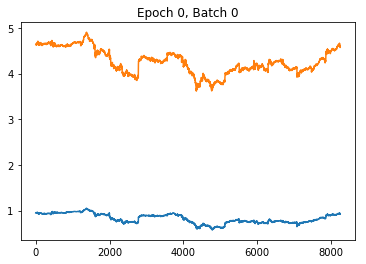

Epoch:0, Batch:1, MSE:0.11751672
Epoch:0, Batch:2, MSE:0.5161573
Epoch:0, Batch:3, MSE:0.18232527
Epoch:0, Batch:4, MSE:0.035954878
Epoch:0, Batch:5, MSE:0.15458637
(1, 8254)
(8254,)


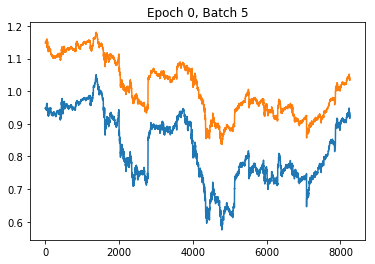

Epoch:0, Batch:6, MSE:0.05769013
Epoch:0, Batch:7, MSE:0.023495287
Epoch:0, Batch:8, MSE:0.068210654
Epoch:0, Batch:9, MSE:0.035058327
Epoch:0, Batch:10, MSE:0.0058806017
(1, 8254)
(8254,)


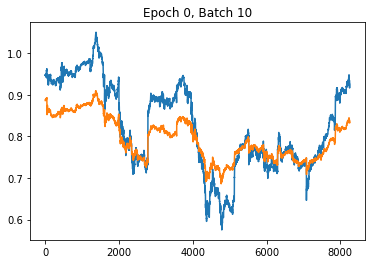

Epoch:0, Batch:11, MSE:0.04228602
Epoch:0, Batch:12, MSE:0.023301769
Epoch:0, Batch:13, MSE:0.003617978
Epoch:0, Batch:14, MSE:0.026368521
Epoch:0, Batch:15, MSE:0.016053176
(1, 8254)
(8254,)


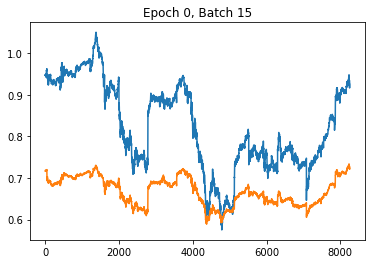

Epoch:0, Batch:16, MSE:0.002707504
Epoch:0, Batch:17, MSE:0.013330368
Epoch:0, Batch:18, MSE:0.015748821
Epoch:0, Batch:19, MSE:0.004819503
Epoch:0, Batch:20, MSE:0.005510585
(1, 8254)
(8254,)


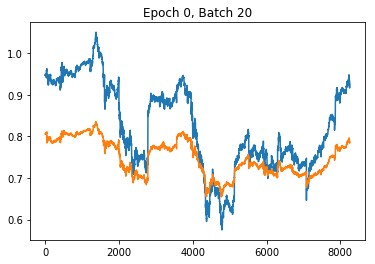

Epoch:0, Batch:21, MSE:0.011891523
Epoch:0, Batch:22, MSE:0.0076962314
Epoch:0, Batch:23, MSE:0.002130413
Epoch:0, Batch:24, MSE:0.0069772033
Epoch:0, Batch:25, MSE:0.009022738
(1, 8254)
(8254,)


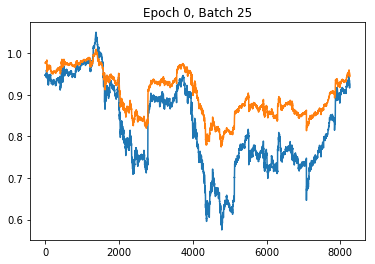

Epoch:0, Batch:26, MSE:0.0029871373
Epoch:0, Batch:27, MSE:0.003355708
Epoch:0, Batch:28, MSE:0.007173364
Epoch:0, Batch:29, MSE:0.004560865
Epoch:0, Batch:30, MSE:0.0018866387
(1, 8254)
(8254,)


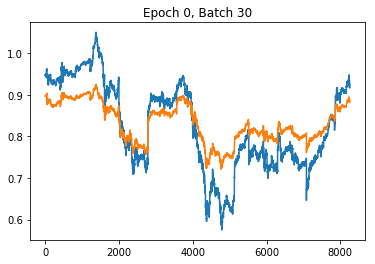

Epoch:0, Batch:31, MSE:0.0050665345
Epoch:0, Batch:32, MSE:0.004432819
Epoch:0, Batch:33, MSE:0.0015276547
Epoch:0, Batch:34, MSE:0.003448772
Epoch:0, Batch:35, MSE:0.0043683387
(1, 8254)
(8254,)


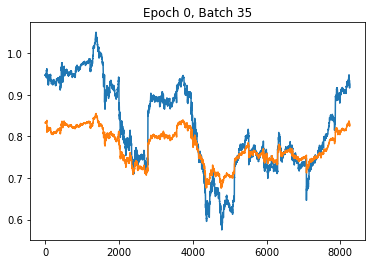

Epoch:0, Batch:36, MSE:0.0019619795
Epoch:0, Batch:37, MSE:0.0018452873
Epoch:0, Batch:38, MSE:0.003882152
Epoch:0, Batch:39, MSE:0.001991901
Epoch:0, Batch:40, MSE:0.0014764629
(1, 8254)
(8254,)


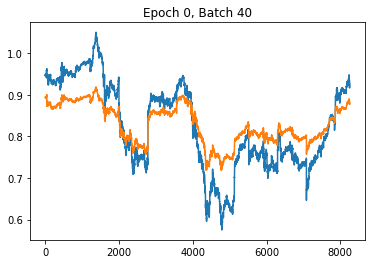

Epoch:0, Batch:41, MSE:0.002995912
Epoch:0, Batch:42, MSE:0.0020844764
Epoch:0, Batch:43, MSE:0.0013138761
Epoch:0, Batch:44, MSE:0.002803687
Epoch:0, Batch:45, MSE:0.0016477777
(1, 8254)
(8254,)


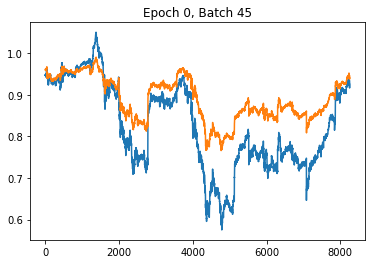

Epoch:0, Batch:46, MSE:0.001176656
Epoch:0, Batch:47, MSE:0.0019240201
Epoch:0, Batch:48, MSE:0.0014547647
Epoch:0, Batch:49, MSE:0.001276688
Epoch:0, Batch:50, MSE:0.0016746602
(1, 8254)
(8254,)


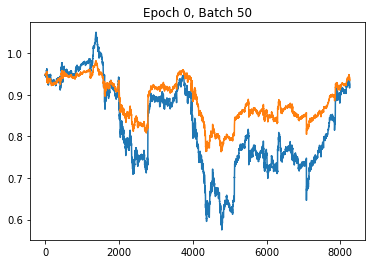

Epoch:0, Batch:51, MSE:0.0012471089
Epoch:0, Batch:52, MSE:0.0013353887
Epoch:0, Batch:53, MSE:0.0015366724
Epoch:0, Batch:54, MSE:0.0014172904
Epoch:0, Batch:55, MSE:0.0010478995
(1, 8254)
(8254,)


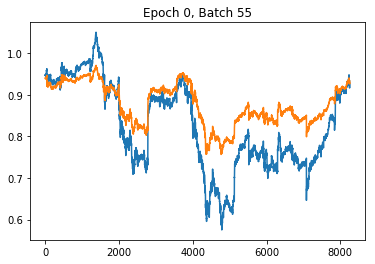

Epoch:0, Batch:56, MSE:0.0012419274
Epoch:0, Batch:57, MSE:0.0011724369
Epoch:0, Batch:58, MSE:0.0010292557
Epoch:0, Batch:59, MSE:0.00093796634
Epoch:0, Batch:60, MSE:0.00082812563
(1, 8254)
(8254,)


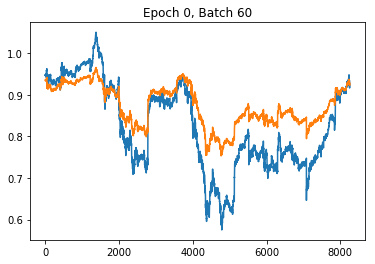

Epoch:0, Batch:61, MSE:0.0011055169
Epoch:0, Batch:62, MSE:0.0009337573
Epoch:0, Batch:63, MSE:0.00096060085
Epoch:0, Batch:64, MSE:0.0009474978
Epoch:0, Batch:65, MSE:0.00091439195
(1, 8254)
(8254,)


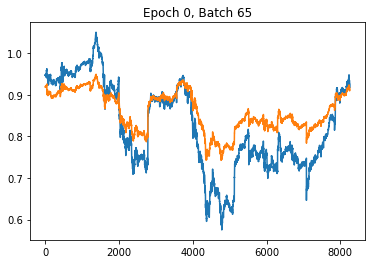

Epoch:0, Batch:66, MSE:0.0009758015
Epoch:0, Batch:67, MSE:0.0010294057
Epoch:0, Batch:68, MSE:0.0009260293
Epoch:0, Batch:69, MSE:0.0008460696
Epoch:0, Batch:70, MSE:0.00092682824
(1, 8254)
(8254,)


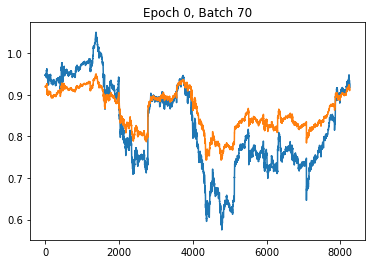

Epoch:0, Batch:71, MSE:0.0007361981
Epoch:0, Batch:72, MSE:0.00089763035
Epoch:0, Batch:73, MSE:0.0008720617
Epoch:0, Batch:74, MSE:0.00080831564
Epoch:0, Batch:75, MSE:0.0007976886
(1, 8254)
(8254,)


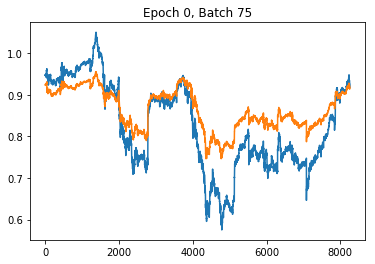

Epoch:0, Batch:76, MSE:0.0008572255
Epoch:0, Batch:77, MSE:0.0007283604
Epoch:0, Batch:78, MSE:0.00075191143
Epoch:0, Batch:79, MSE:0.00092575955
Epoch:0, Batch:80, MSE:0.0007200193
(1, 8254)
(8254,)


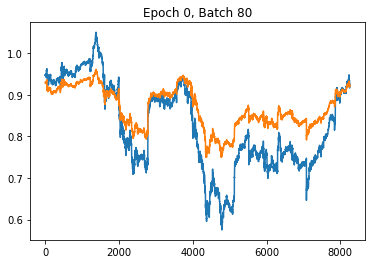

Epoch:0, Batch:81, MSE:0.00079347217
Epoch:0, Batch:82, MSE:0.0006638161
Epoch:0, Batch:83, MSE:0.00072331814
Epoch:0, Batch:84, MSE:0.0005905241
Epoch:0, Batch:85, MSE:0.0006417517
(1, 8254)
(8254,)


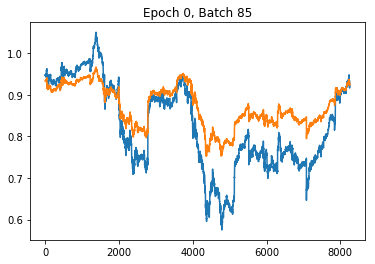

Epoch:0, Batch:86, MSE:0.00073544343
Epoch:0, Batch:87, MSE:0.0006892767
Epoch:0, Batch:88, MSE:0.0006238854
Epoch:0, Batch:89, MSE:0.0007489242
Epoch:0, Batch:90, MSE:0.00060591137
(1, 8254)
(8254,)


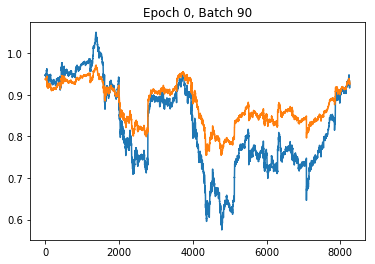

Epoch:0, Batch:91, MSE:0.0005542637
Epoch:0, Batch:92, MSE:0.0005737711
Epoch:0, Batch:93, MSE:0.00061177055
Epoch:0, Batch:94, MSE:0.0006687454
Epoch:0, Batch:95, MSE:0.0006172011
(1, 8254)
(8254,)


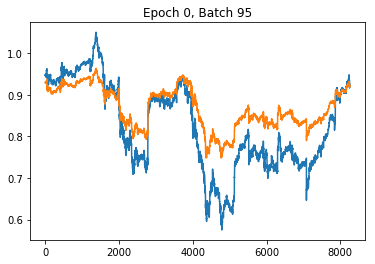

Epoch:0, Batch:96, MSE:0.0006234904
Epoch:0, Batch:97, MSE:0.0005911065
Epoch:0, Batch:98, MSE:0.00059014966
Epoch:0, Batch:99, MSE:0.0005850451
Epoch:0, Batch:100, MSE:0.00054465357
(1, 8254)
(8254,)


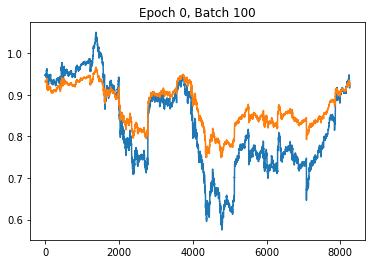

Epoch:0, Batch:101, MSE:0.0005623972
Epoch:0, Batch:102, MSE:0.0006510195
Epoch:0, Batch:103, MSE:0.00053397013
Epoch:0, Batch:104, MSE:0.0005782667
Epoch:0, Batch:105, MSE:0.00058868155
(1, 8254)
(8254,)


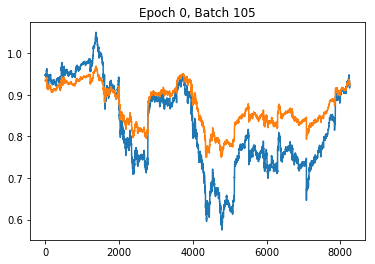

Epoch:0, Batch:106, MSE:0.0006209989
Epoch:0, Batch:107, MSE:0.0005375528
Epoch:0, Batch:108, MSE:0.00046718988
Epoch:0, Batch:109, MSE:0.00046118174
Epoch:0, Batch:110, MSE:0.00053569203
(1, 8254)
(8254,)


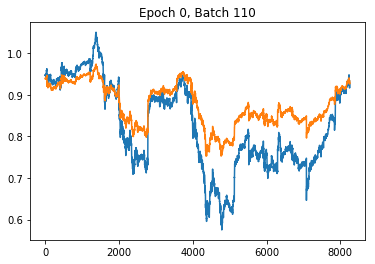

Epoch:0, Batch:111, MSE:0.0005036503
Epoch:0, Batch:112, MSE:0.00057282066
Epoch:0, Batch:113, MSE:0.00051534246
Epoch:0, Batch:114, MSE:0.00060683023
Epoch:0, Batch:115, MSE:0.0005135797
(1, 8254)
(8254,)


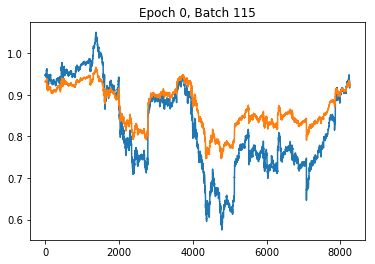

Epoch:0, Batch:116, MSE:0.0005357024
Epoch:0, Batch:117, MSE:0.00046079155
Epoch:0, Batch:118, MSE:0.00044699915
Epoch:0, Batch:119, MSE:0.00048818454
Epoch:0, Batch:120, MSE:0.000454058
(1, 8254)
(8254,)


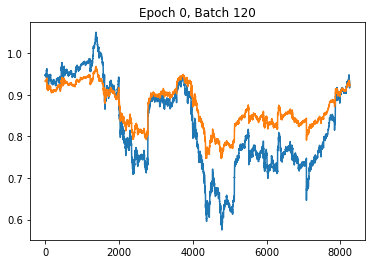

Epoch:0, Batch:121, MSE:0.0005295943
Epoch:0, Batch:122, MSE:0.00043719757
Epoch:0, Batch:123, MSE:0.00045685886
Epoch:0, Batch:124, MSE:0.00040844985
Epoch:0, Batch:125, MSE:0.0005211872
(1, 8254)
(8254,)


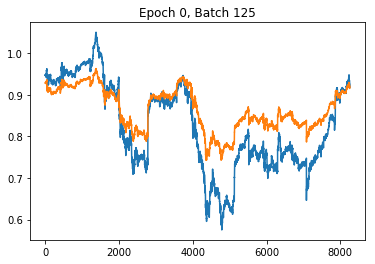

Epoch:0, Batch:126, MSE:0.0005037724
Epoch:0, Batch:127, MSE:0.00045443856
Epoch:1, Batch:0, MSE:0.00041483523
(1, 8254)
(8254,)


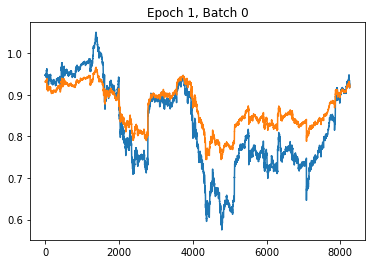

Epoch:1, Batch:1, MSE:0.00051167794
Epoch:1, Batch:2, MSE:0.00043114863
Epoch:1, Batch:3, MSE:0.00049350323
Epoch:1, Batch:4, MSE:0.00041759436
Epoch:1, Batch:5, MSE:0.00046676895
(1, 8254)
(8254,)


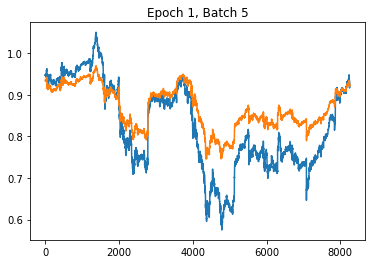

Epoch:1, Batch:6, MSE:0.0004819744
Epoch:1, Batch:7, MSE:0.0005044534
Epoch:1, Batch:8, MSE:0.0004894932
Epoch:1, Batch:9, MSE:0.00038037007
Epoch:1, Batch:10, MSE:0.00043201624
(1, 8254)
(8254,)


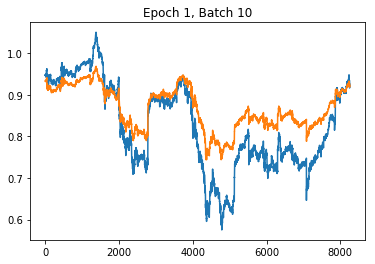

Epoch:1, Batch:11, MSE:0.0003870462
Epoch:1, Batch:12, MSE:0.00044616518
Epoch:1, Batch:13, MSE:0.00043114487
Epoch:1, Batch:14, MSE:0.0004419928
Epoch:1, Batch:15, MSE:0.0004236275
(1, 8254)
(8254,)


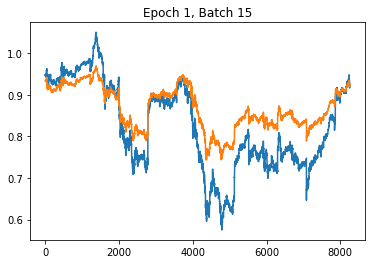

Epoch:1, Batch:16, MSE:0.0004042371
Epoch:1, Batch:17, MSE:0.00044905295
Epoch:1, Batch:18, MSE:0.00043867523
Epoch:1, Batch:19, MSE:0.0003812739
Epoch:1, Batch:20, MSE:0.00040272632
(1, 8254)
(8254,)


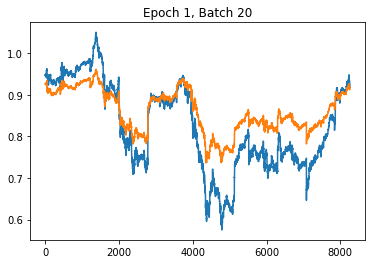

Epoch:1, Batch:21, MSE:0.00042064878
Epoch:1, Batch:22, MSE:0.00039479582
Epoch:1, Batch:23, MSE:0.0003564725
Epoch:1, Batch:24, MSE:0.0004144777
Epoch:1, Batch:25, MSE:0.00033601857
(1, 8254)
(8254,)


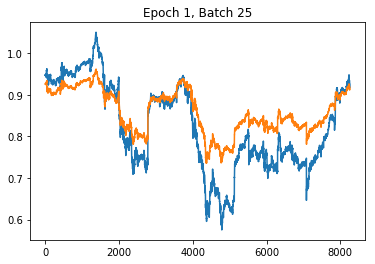

Epoch:1, Batch:26, MSE:0.000506174
Epoch:1, Batch:27, MSE:0.0004004438
Epoch:1, Batch:28, MSE:0.00040070963
Epoch:1, Batch:29, MSE:0.00034551206
Epoch:1, Batch:30, MSE:0.00041604193
(1, 8254)
(8254,)


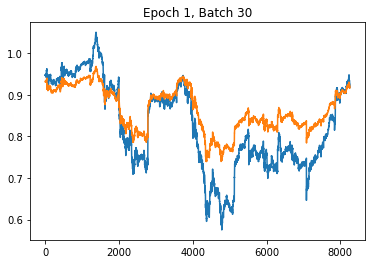

Epoch:1, Batch:31, MSE:0.00039563765
Epoch:1, Batch:32, MSE:0.0003784189
Epoch:1, Batch:33, MSE:0.00044611248
Epoch:1, Batch:34, MSE:0.00037405652
Epoch:1, Batch:35, MSE:0.0003979493
(1, 8254)
(8254,)


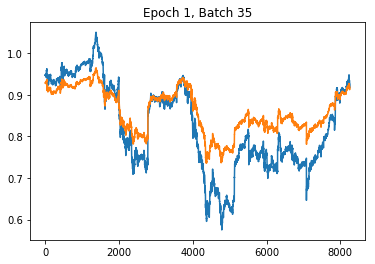

Epoch:1, Batch:36, MSE:0.00037291346
Epoch:1, Batch:37, MSE:0.00034190874
Epoch:1, Batch:38, MSE:0.000349207
Epoch:1, Batch:39, MSE:0.00037218563
Epoch:1, Batch:40, MSE:0.00028007195
(1, 8254)
(8254,)


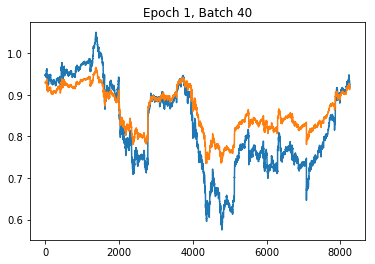

Epoch:1, Batch:41, MSE:0.00035461417
Epoch:1, Batch:42, MSE:0.00039428374
Epoch:1, Batch:43, MSE:0.00033227963
Epoch:1, Batch:44, MSE:0.00041767073
Epoch:1, Batch:45, MSE:0.00038624567
(1, 8254)
(8254,)


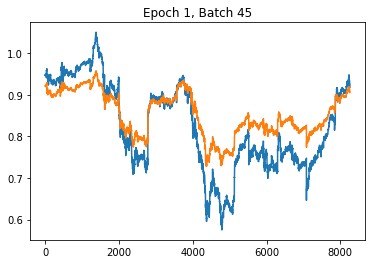

Epoch:1, Batch:46, MSE:0.0004724093
Epoch:1, Batch:47, MSE:0.00035137293
Epoch:1, Batch:48, MSE:0.00044786936
Epoch:1, Batch:49, MSE:0.00030216615
Epoch:1, Batch:50, MSE:0.00041120275
(1, 8254)
(8254,)


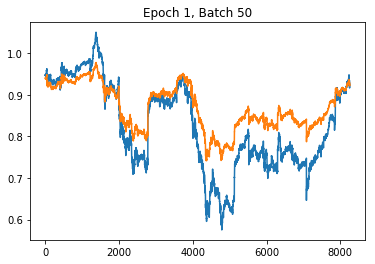

Epoch:1, Batch:51, MSE:0.00035771538
Epoch:1, Batch:52, MSE:0.0003920659
Epoch:1, Batch:53, MSE:0.0003408729
Epoch:1, Batch:54, MSE:0.00040845785
Epoch:1, Batch:55, MSE:0.00044649479
(1, 8254)
(8254,)


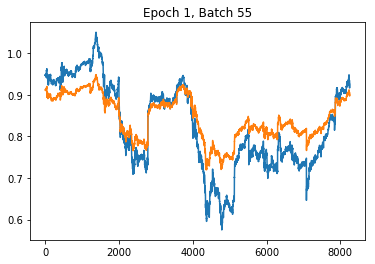

Epoch:1, Batch:56, MSE:0.00029309245
Epoch:1, Batch:57, MSE:0.00042028714
Epoch:1, Batch:58, MSE:0.00035005008
Epoch:1, Batch:59, MSE:0.00043678808
Epoch:1, Batch:60, MSE:0.00032367237
(1, 8254)
(8254,)


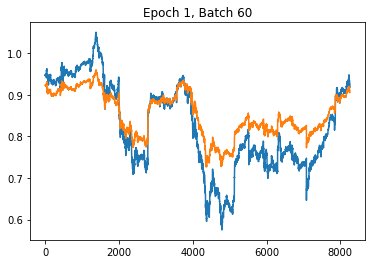

Epoch:1, Batch:61, MSE:0.00042772386
Epoch:1, Batch:62, MSE:0.0003786132
Epoch:1, Batch:63, MSE:0.0003996767
Epoch:1, Batch:64, MSE:0.00034807646
Epoch:1, Batch:65, MSE:0.00029658305
(1, 8254)
(8254,)


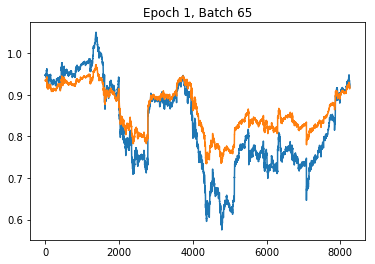

Epoch:1, Batch:66, MSE:0.00033880322
Epoch:1, Batch:67, MSE:0.0003694126
Epoch:1, Batch:68, MSE:0.0003798681
Epoch:1, Batch:69, MSE:0.00033408447
Epoch:1, Batch:70, MSE:0.00031825394
(1, 8254)
(8254,)


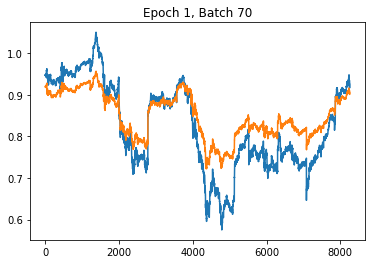

Epoch:1, Batch:71, MSE:0.00034517067
Epoch:1, Batch:72, MSE:0.00031773146
Epoch:1, Batch:73, MSE:0.00025479763
Epoch:1, Batch:74, MSE:0.0003649111
Epoch:1, Batch:75, MSE:0.00030642268
(1, 8254)
(8254,)


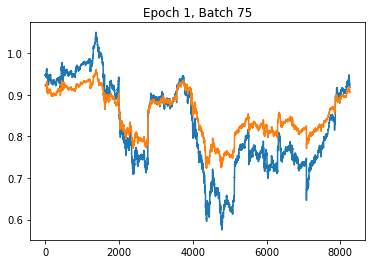

Epoch:1, Batch:76, MSE:0.0003943685
Epoch:1, Batch:77, MSE:0.00028567103
Epoch:1, Batch:78, MSE:0.00033824722
Epoch:1, Batch:79, MSE:0.00029177335
Epoch:1, Batch:80, MSE:0.0003416437
(1, 8254)
(8254,)


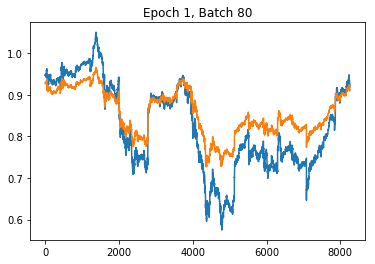

Epoch:1, Batch:81, MSE:0.0003088436
Epoch:1, Batch:82, MSE:0.00030396332
Epoch:1, Batch:83, MSE:0.00034273718
Epoch:1, Batch:84, MSE:0.0002647132
Epoch:1, Batch:85, MSE:0.00033666065
(1, 8254)
(8254,)


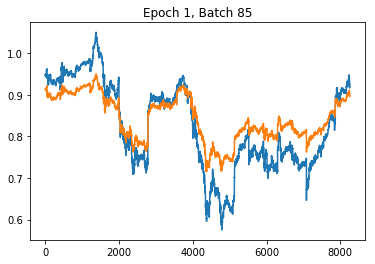

Epoch:1, Batch:86, MSE:0.00030712082
Epoch:1, Batch:87, MSE:0.0004110425
Epoch:1, Batch:88, MSE:0.00034171686
Epoch:1, Batch:89, MSE:0.0004618269
Epoch:1, Batch:90, MSE:0.00037625007
(1, 8254)
(8254,)


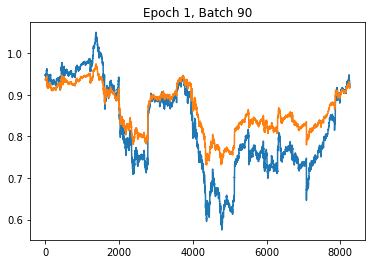

Epoch:1, Batch:91, MSE:0.0003015023
Epoch:1, Batch:92, MSE:0.00039345495
Epoch:1, Batch:93, MSE:0.0002844422
Epoch:1, Batch:94, MSE:0.00034339828
Epoch:1, Batch:95, MSE:0.0002690573
(1, 8254)
(8254,)


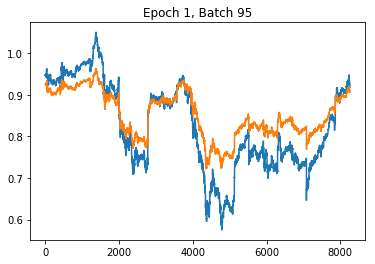

Epoch:1, Batch:96, MSE:0.00032351096
Epoch:1, Batch:97, MSE:0.00032311532
Epoch:1, Batch:98, MSE:0.00025084746
Epoch:1, Batch:99, MSE:0.0002851308
Epoch:1, Batch:100, MSE:0.00026479978
(1, 8254)
(8254,)


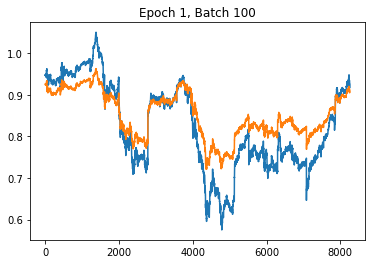

Epoch:1, Batch:101, MSE:0.0002614805
Epoch:1, Batch:102, MSE:0.00025696203
Epoch:1, Batch:103, MSE:0.00027565332
Epoch:1, Batch:104, MSE:0.00029547472
Epoch:1, Batch:105, MSE:0.00023998824
(1, 8254)
(8254,)


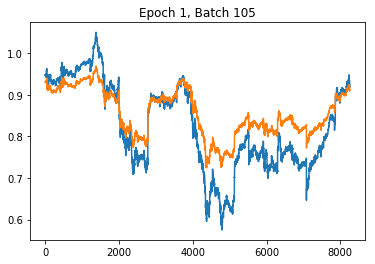

Epoch:1, Batch:106, MSE:0.00027616962
Epoch:1, Batch:107, MSE:0.00023029339
Epoch:1, Batch:108, MSE:0.00031854038
Epoch:1, Batch:109, MSE:0.00027529942
Epoch:1, Batch:110, MSE:0.00023558912
(1, 8254)
(8254,)


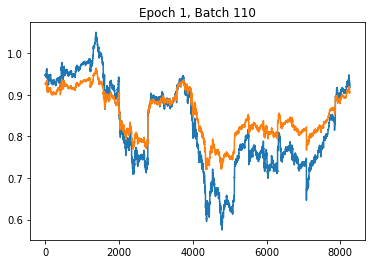

Epoch:1, Batch:111, MSE:0.0002926386
Epoch:1, Batch:112, MSE:0.0002651577
Epoch:1, Batch:113, MSE:0.00025624674
Epoch:1, Batch:114, MSE:0.00026913953
Epoch:1, Batch:115, MSE:0.00023797026
(1, 8254)
(8254,)


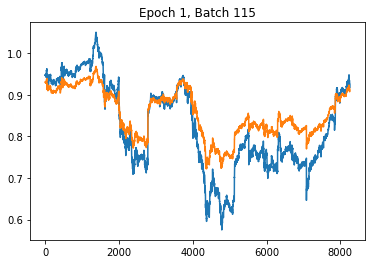

Epoch:1, Batch:116, MSE:0.000254897
Epoch:1, Batch:117, MSE:0.00024339485
Epoch:1, Batch:118, MSE:0.000205405
Epoch:1, Batch:119, MSE:0.00024517794
Epoch:1, Batch:120, MSE:0.000233885
(1, 8254)
(8254,)


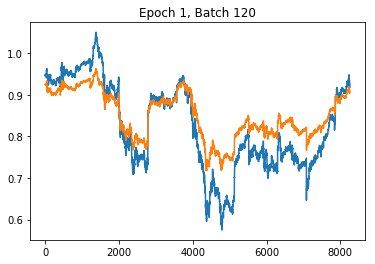

Epoch:1, Batch:121, MSE:0.00022569198
Epoch:1, Batch:122, MSE:0.00024354232
Epoch:1, Batch:123, MSE:0.00018619117
Epoch:1, Batch:124, MSE:0.00023794899
Epoch:1, Batch:125, MSE:0.0002120624
(1, 8254)
(8254,)


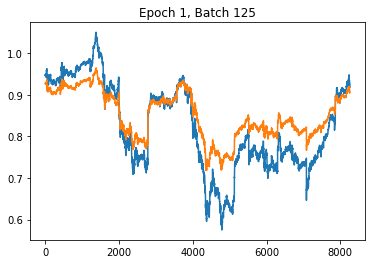

Epoch:1, Batch:126, MSE:0.00022068314
Epoch:1, Batch:127, MSE:0.00019558854
Epoch:2, Batch:0, MSE:0.00022899544
(1, 8254)
(8254,)


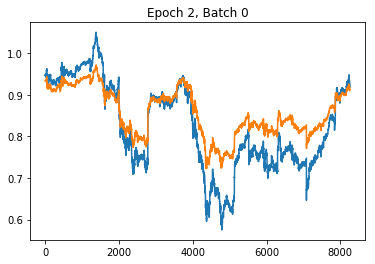

Epoch:2, Batch:1, MSE:0.0002619942
Epoch:2, Batch:2, MSE:0.00023386483
Epoch:2, Batch:3, MSE:0.00020343742
Epoch:2, Batch:4, MSE:0.00019836062
Epoch:2, Batch:5, MSE:0.00026020966
(1, 8254)
(8254,)


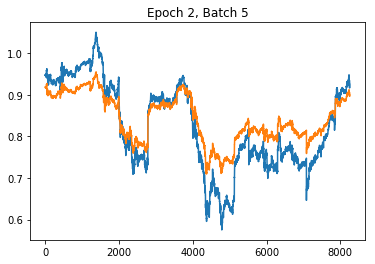

Epoch:2, Batch:6, MSE:0.00019402298
Epoch:2, Batch:7, MSE:0.0002353772
Epoch:2, Batch:8, MSE:0.0002516474
Epoch:2, Batch:9, MSE:0.00023881579
Epoch:2, Batch:10, MSE:0.00023793019
(1, 8254)
(8254,)


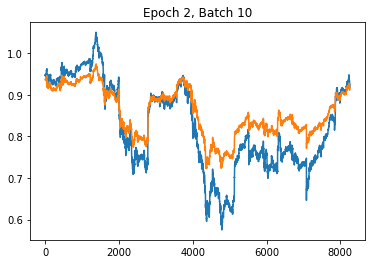

Epoch:2, Batch:11, MSE:0.0002054302
Epoch:2, Batch:12, MSE:0.00034983948
Epoch:2, Batch:13, MSE:0.00025013695
Epoch:2, Batch:14, MSE:0.000250059
Epoch:2, Batch:15, MSE:0.0003741868
(1, 8254)
(8254,)


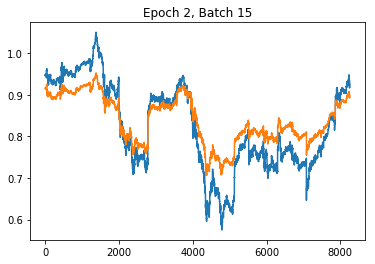

Epoch:2, Batch:16, MSE:0.00020238761
Epoch:2, Batch:17, MSE:0.00028386092
Epoch:2, Batch:18, MSE:0.00030742338
Epoch:2, Batch:19, MSE:0.0002010867
Epoch:2, Batch:20, MSE:0.00024481065
(1, 8254)
(8254,)


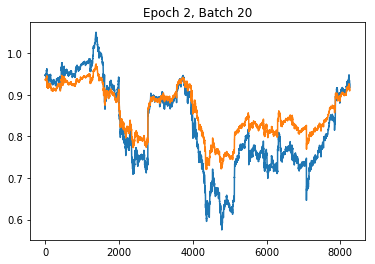

Epoch:2, Batch:21, MSE:0.00020762309
Epoch:2, Batch:22, MSE:0.00027867025
Epoch:2, Batch:23, MSE:0.00025132135
Epoch:2, Batch:24, MSE:0.00018953584
Epoch:2, Batch:25, MSE:0.0002154028
(1, 8254)
(8254,)


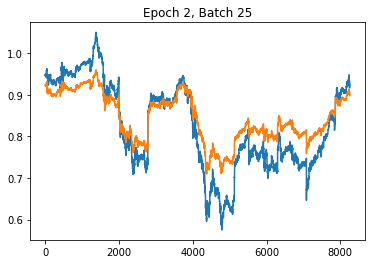

Epoch:2, Batch:26, MSE:0.00019572102
Epoch:2, Batch:27, MSE:0.00019913354
Epoch:2, Batch:28, MSE:0.00019483073
Epoch:2, Batch:29, MSE:0.00017604892
Epoch:2, Batch:30, MSE:0.00022038117
(1, 8254)
(8254,)


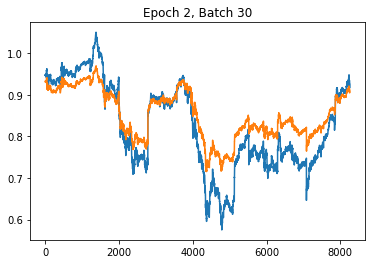

Epoch:2, Batch:31, MSE:0.00023024392
Epoch:2, Batch:32, MSE:0.00020541994
Epoch:2, Batch:33, MSE:0.0002559738
Epoch:2, Batch:34, MSE:0.0001868865
Epoch:2, Batch:35, MSE:0.0001944896
(1, 8254)
(8254,)


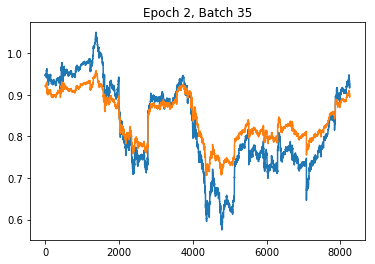

Epoch:2, Batch:36, MSE:0.00022662863
Epoch:2, Batch:37, MSE:0.00017830073
Epoch:2, Batch:38, MSE:0.00018339201
Epoch:2, Batch:39, MSE:0.00019897136
Epoch:2, Batch:40, MSE:0.000191826
(1, 8254)
(8254,)


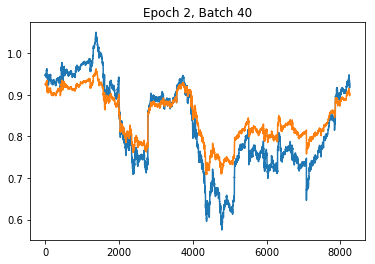

Epoch:2, Batch:41, MSE:0.00020560507
Epoch:2, Batch:42, MSE:0.00027945676
Epoch:2, Batch:43, MSE:0.0001612766
Epoch:2, Batch:44, MSE:0.00019297213
Epoch:2, Batch:45, MSE:0.00026350704
(1, 8254)
(8254,)


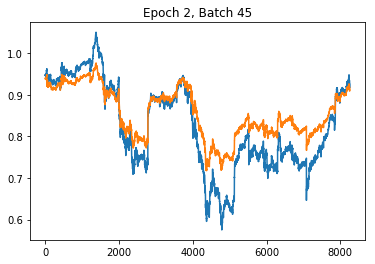

Epoch:2, Batch:46, MSE:0.00016553974
Epoch:2, Batch:47, MSE:0.00022362749
Epoch:2, Batch:48, MSE:0.00019600341
Epoch:2, Batch:49, MSE:0.00016780016
Epoch:2, Batch:50, MSE:0.000231227
(1, 8254)
(8254,)


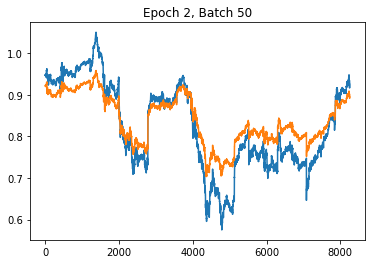

Epoch:2, Batch:51, MSE:0.000291696
Epoch:2, Batch:52, MSE:0.00018339345
Epoch:2, Batch:53, MSE:0.0002990479
Epoch:2, Batch:54, MSE:0.00028930258
Epoch:2, Batch:55, MSE:0.00022374571
(1, 8254)
(8254,)


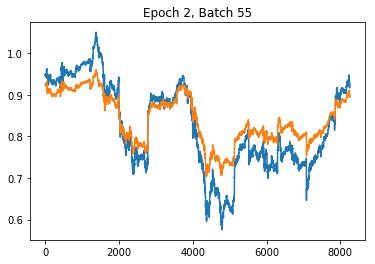

Epoch:2, Batch:56, MSE:0.00032200062
Epoch:2, Batch:57, MSE:0.00045250123
Epoch:2, Batch:58, MSE:0.00023794695
Epoch:2, Batch:59, MSE:0.00028677972
Epoch:2, Batch:60, MSE:0.0005430334
(1, 8254)
(8254,)


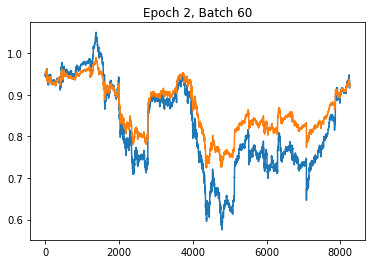

Epoch:2, Batch:61, MSE:0.0003093897
Epoch:2, Batch:62, MSE:0.00022137852
Epoch:2, Batch:63, MSE:0.00044915668
Epoch:2, Batch:64, MSE:0.00041165872
Epoch:2, Batch:65, MSE:0.00017179681
(1, 8254)
(8254,)


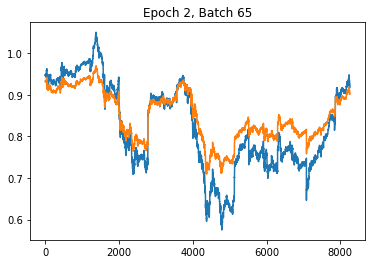

Epoch:2, Batch:66, MSE:0.00034809313
Epoch:2, Batch:67, MSE:0.00031731982
Epoch:2, Batch:68, MSE:0.00015159015
Epoch:2, Batch:69, MSE:0.0002867573
Epoch:2, Batch:70, MSE:0.00028097656
(1, 8254)
(8254,)


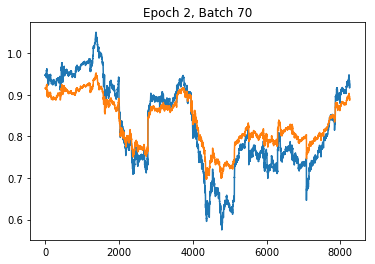

Epoch:2, Batch:71, MSE:0.00015154576
Epoch:2, Batch:72, MSE:0.0002774048
Epoch:2, Batch:73, MSE:0.00024554308
Epoch:2, Batch:74, MSE:0.00016449517
Epoch:2, Batch:75, MSE:0.0002808031
(1, 8254)
(8254,)


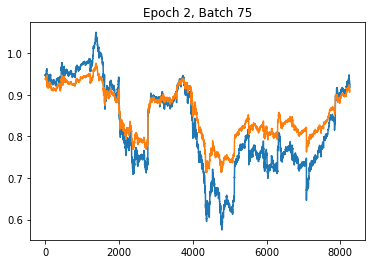

Epoch:2, Batch:76, MSE:0.00026136596
Epoch:2, Batch:77, MSE:0.0001516656
Epoch:2, Batch:78, MSE:0.00023948116
Epoch:2, Batch:79, MSE:0.00036030298
Epoch:2, Batch:80, MSE:0.00016077947
(1, 8254)
(8254,)


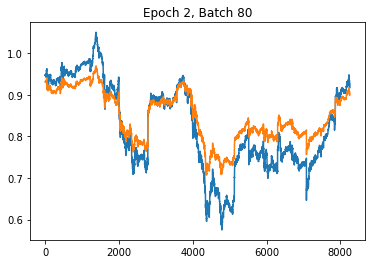

Epoch:2, Batch:81, MSE:0.00027840908
Epoch:2, Batch:82, MSE:0.00037311268
Epoch:2, Batch:83, MSE:0.00015672925
Epoch:2, Batch:84, MSE:0.00020601152
Epoch:2, Batch:85, MSE:0.0001754878
(1, 8254)
(8254,)


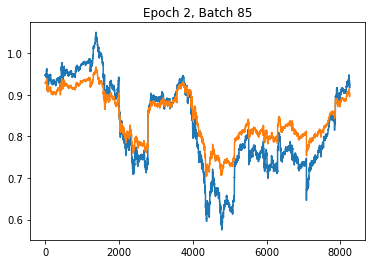

Epoch:2, Batch:86, MSE:0.00014684282
Epoch:2, Batch:87, MSE:0.00018970534
Epoch:2, Batch:88, MSE:0.00014334635
Epoch:2, Batch:89, MSE:0.00021631278
Epoch:2, Batch:90, MSE:0.00021504087
(1, 8254)
(8254,)


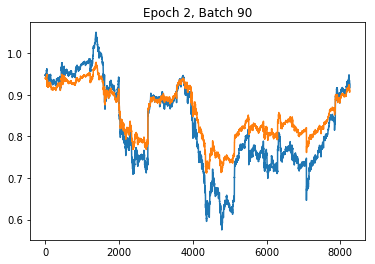

Epoch:2, Batch:91, MSE:0.00014003352
Epoch:2, Batch:92, MSE:0.00019850908
Epoch:2, Batch:93, MSE:0.00032654087
Epoch:2, Batch:94, MSE:0.00018843939
Epoch:2, Batch:95, MSE:0.00015077615
(1, 8254)
(8254,)


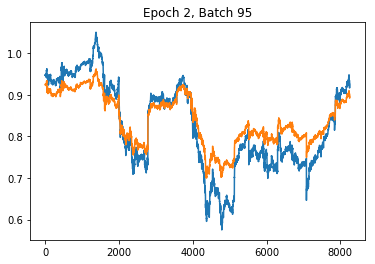

Epoch:2, Batch:96, MSE:0.00020419907
Epoch:2, Batch:97, MSE:0.00018986413
Epoch:2, Batch:98, MSE:0.00015336327
Epoch:2, Batch:99, MSE:0.00019630158
Epoch:2, Batch:100, MSE:0.00019013425
(1, 8254)
(8254,)


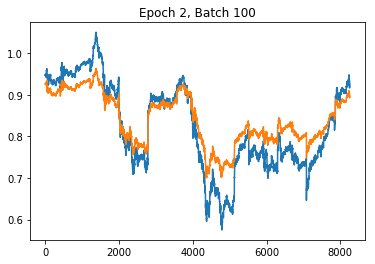

Epoch:2, Batch:101, MSE:0.00016559589
Epoch:2, Batch:102, MSE:0.0001769186
Epoch:2, Batch:103, MSE:0.00015438053
Epoch:2, Batch:104, MSE:0.00014346544
Epoch:2, Batch:105, MSE:0.0001786596
(1, 8254)
(8254,)


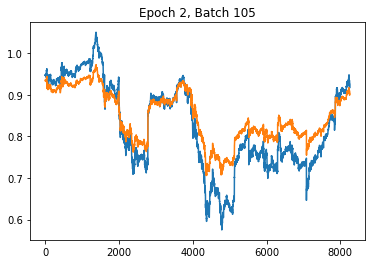

Epoch:2, Batch:106, MSE:0.00015918934
Epoch:2, Batch:107, MSE:0.00015306074
Epoch:2, Batch:108, MSE:0.00014427475
Epoch:2, Batch:109, MSE:0.00013493172
Epoch:2, Batch:110, MSE:0.00012421113
(1, 8254)
(8254,)


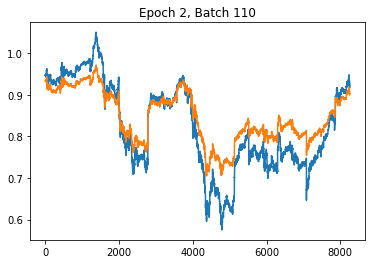

Epoch:2, Batch:111, MSE:0.0001359304
Epoch:2, Batch:112, MSE:0.00016386436
Epoch:2, Batch:113, MSE:0.00016091038
Epoch:2, Batch:114, MSE:0.00013470073
Epoch:2, Batch:115, MSE:0.0001470101
(1, 8254)
(8254,)


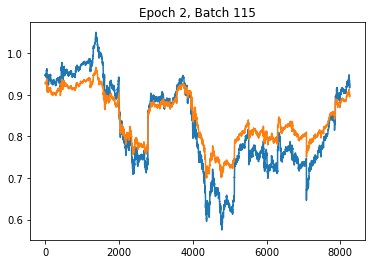

Epoch:2, Batch:116, MSE:0.00011001591
Epoch:2, Batch:117, MSE:0.00015591795
Epoch:2, Batch:118, MSE:0.00015763307
Epoch:2, Batch:119, MSE:0.00014553289
Epoch:2, Batch:120, MSE:0.00013647502
(1, 8254)
(8254,)


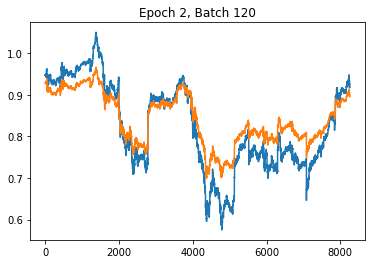

Epoch:2, Batch:121, MSE:0.00013919236
Epoch:2, Batch:122, MSE:0.00013035719
Epoch:2, Batch:123, MSE:0.0001099978
Epoch:2, Batch:124, MSE:0.00012822733
Epoch:2, Batch:125, MSE:0.00011974313
(1, 8254)
(8254,)


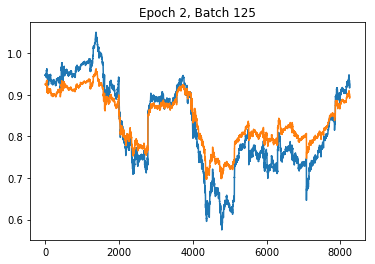

Epoch:2, Batch:126, MSE:0.00016583351
Epoch:2, Batch:127, MSE:0.00014730984
Epoch:3, Batch:0, MSE:0.00011006844
(1, 8254)
(8254,)


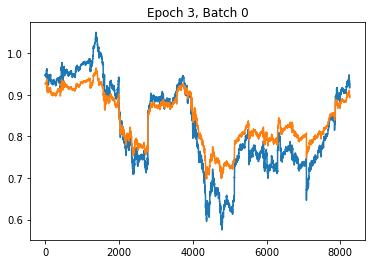

Epoch:3, Batch:1, MSE:0.00014405797
Epoch:3, Batch:2, MSE:0.000103224105
Epoch:3, Batch:3, MSE:0.00014698962
Epoch:3, Batch:4, MSE:0.00022835698
Epoch:3, Batch:5, MSE:0.00020494888
(1, 8254)
(8254,)


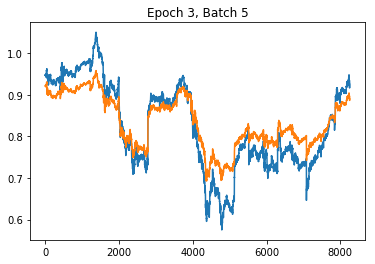

Epoch:3, Batch:6, MSE:0.0001580972
Epoch:3, Batch:7, MSE:0.00011612872
Epoch:3, Batch:8, MSE:0.000111313115
Epoch:3, Batch:9, MSE:0.00017400912
Epoch:3, Batch:10, MSE:0.00023931352
(1, 8254)
(8254,)


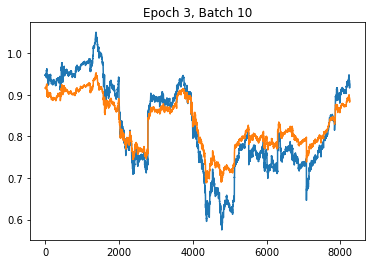

Epoch:3, Batch:11, MSE:0.00020280911
Epoch:3, Batch:12, MSE:0.00014590891
Epoch:3, Batch:13, MSE:0.00014404133
Epoch:3, Batch:14, MSE:0.00027442834
Epoch:3, Batch:15, MSE:0.00037324693
(1, 8254)
(8254,)


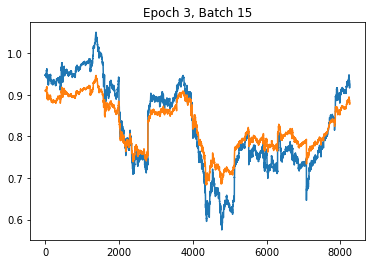

Epoch:3, Batch:16, MSE:0.00029949044
Epoch:3, Batch:17, MSE:0.00015512886
Epoch:3, Batch:18, MSE:0.0001249837
Epoch:3, Batch:19, MSE:0.00018451334
Epoch:3, Batch:20, MSE:0.00020470709
(1, 8254)
(8254,)


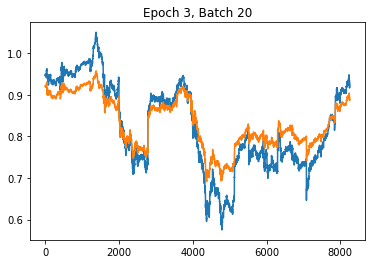

Epoch:3, Batch:21, MSE:0.00018969079
Epoch:3, Batch:22, MSE:0.0001255098
Epoch:3, Batch:23, MSE:0.00012773526
Epoch:3, Batch:24, MSE:0.00016375959
Epoch:3, Batch:25, MSE:0.00012933897
(1, 8254)
(8254,)


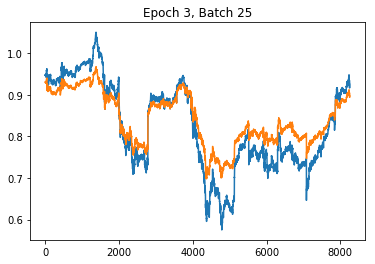

Epoch:3, Batch:26, MSE:0.00011722102
Epoch:3, Batch:27, MSE:0.00011952937
Epoch:3, Batch:28, MSE:0.00015184749
Epoch:3, Batch:29, MSE:0.00015785023
Epoch:3, Batch:30, MSE:0.00013279759
(1, 8254)
(8254,)


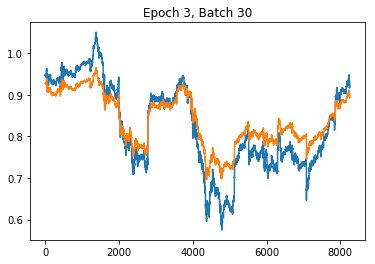

Epoch:3, Batch:31, MSE:0.00013467422
Epoch:3, Batch:32, MSE:0.00011735845
Epoch:3, Batch:33, MSE:0.00014075484
Epoch:3, Batch:34, MSE:0.00012424684
Epoch:3, Batch:35, MSE:0.000116607385
(1, 8254)
(8254,)


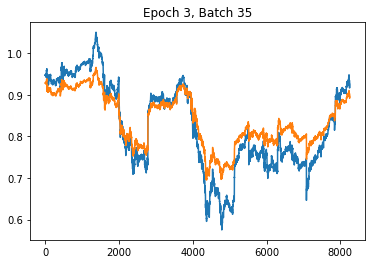

Epoch:3, Batch:36, MSE:0.00014481225
Epoch:3, Batch:37, MSE:0.000108970904
Epoch:3, Batch:38, MSE:0.00013601978
Epoch:3, Batch:39, MSE:0.00017610815
Epoch:3, Batch:40, MSE:0.00015727192
(1, 8254)
(8254,)


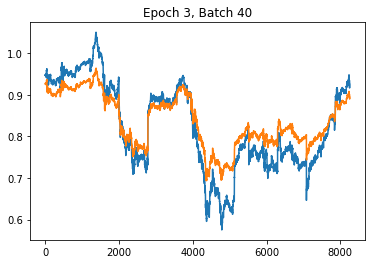

Epoch:3, Batch:41, MSE:0.00013021169
Epoch:3, Batch:42, MSE:0.00013449762
Epoch:3, Batch:43, MSE:0.00020467486
Epoch:3, Batch:44, MSE:0.00023855177
Epoch:3, Batch:45, MSE:0.00017578961
(1, 8254)
(8254,)


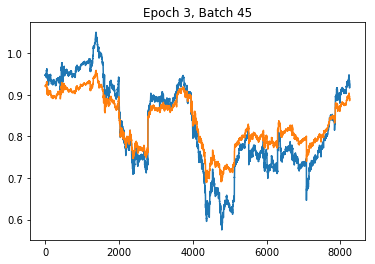

Epoch:3, Batch:46, MSE:9.6694384e-05
Epoch:3, Batch:47, MSE:0.000107299944
Epoch:3, Batch:48, MSE:0.00010666721
Epoch:3, Batch:49, MSE:0.00010627054
Epoch:3, Batch:50, MSE:0.000109527464
(1, 8254)
(8254,)


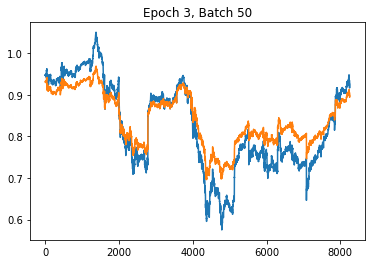

Epoch:3, Batch:51, MSE:0.00012451103
Epoch:3, Batch:52, MSE:0.000120871715
Epoch:3, Batch:53, MSE:0.00012170981
Epoch:3, Batch:54, MSE:0.00012905124
Epoch:3, Batch:55, MSE:0.00014764172
(1, 8254)
(8254,)


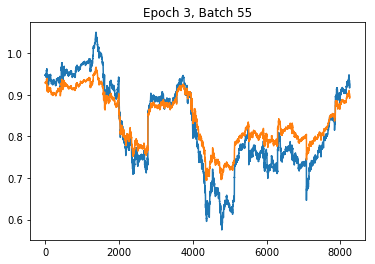

Epoch:3, Batch:56, MSE:0.00011203838
Epoch:3, Batch:57, MSE:9.710228e-05
Epoch:3, Batch:58, MSE:9.9854704e-05
Epoch:3, Batch:59, MSE:0.00014121058
Epoch:3, Batch:60, MSE:0.00017217876
(1, 8254)
(8254,)


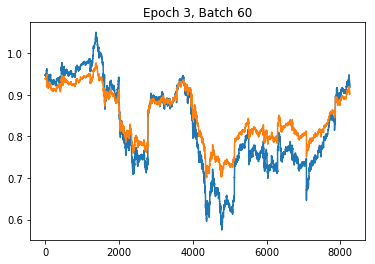

Epoch:3, Batch:61, MSE:0.0001310429
Epoch:3, Batch:62, MSE:0.00012435627
Epoch:3, Batch:63, MSE:0.0001326039
Epoch:3, Batch:64, MSE:0.00011372108
Epoch:3, Batch:65, MSE:0.00019236699
(1, 8254)
(8254,)


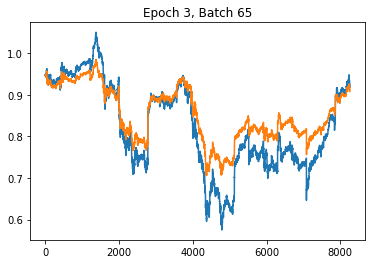

Epoch:3, Batch:66, MSE:0.00029699638
Epoch:3, Batch:67, MSE:0.00024681882
Epoch:3, Batch:68, MSE:0.00018099276
Epoch:3, Batch:69, MSE:0.00014682292
Epoch:3, Batch:70, MSE:0.00015109286
(1, 8254)
(8254,)


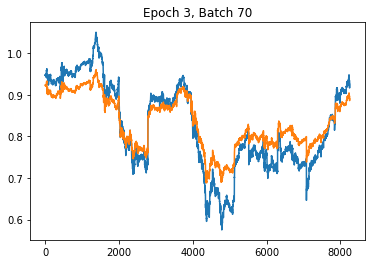

Epoch:3, Batch:71, MSE:0.00015400746
Epoch:3, Batch:72, MSE:0.00016745961
Epoch:3, Batch:73, MSE:0.00013243168
Epoch:3, Batch:74, MSE:0.00011177729
Epoch:3, Batch:75, MSE:0.00011120427
(1, 8254)
(8254,)


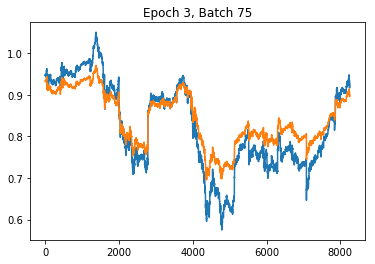

Epoch:3, Batch:76, MSE:0.00015974775
Epoch:3, Batch:77, MSE:0.00022542529
Epoch:3, Batch:78, MSE:0.00034116843
Epoch:3, Batch:79, MSE:0.00048600085
Epoch:3, Batch:80, MSE:0.0007853534
(1, 8254)
(8254,)


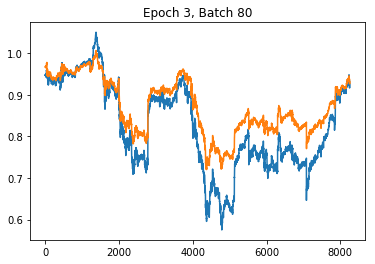

Epoch:3, Batch:81, MSE:0.0005317715
Epoch:3, Batch:82, MSE:0.00024554261
Epoch:3, Batch:83, MSE:0.00010945051
Epoch:3, Batch:84, MSE:0.00017411044
Epoch:3, Batch:85, MSE:0.00036850752
(1, 8254)
(8254,)


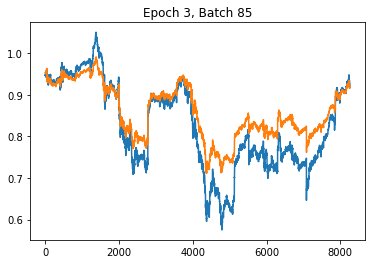

Epoch:3, Batch:86, MSE:0.0004035114
Epoch:3, Batch:87, MSE:0.0002388354
Epoch:3, Batch:88, MSE:0.0001361026
Epoch:3, Batch:89, MSE:0.00013233234
Epoch:3, Batch:90, MSE:0.00042117524
(1, 8254)
(8254,)


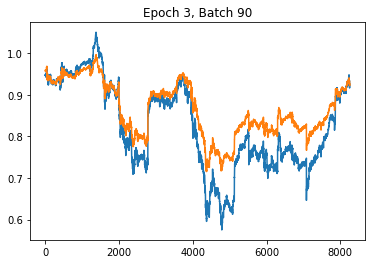

Epoch:3, Batch:91, MSE:0.0007603888
Epoch:3, Batch:92, MSE:0.0007517348
Epoch:3, Batch:93, MSE:0.00041665352
Epoch:3, Batch:94, MSE:0.0001595419
Epoch:3, Batch:95, MSE:0.00017699506
(1, 8254)
(8254,)


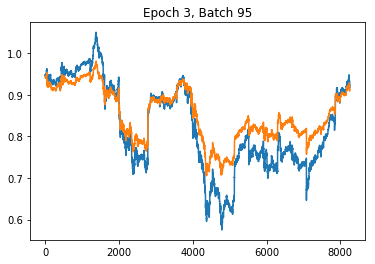

Epoch:3, Batch:96, MSE:0.00042865681
Epoch:3, Batch:97, MSE:0.0008273301
Epoch:3, Batch:98, MSE:0.00090049196
Epoch:3, Batch:99, MSE:0.00071709533
Epoch:3, Batch:100, MSE:0.00029995356
(1, 8254)
(8254,)


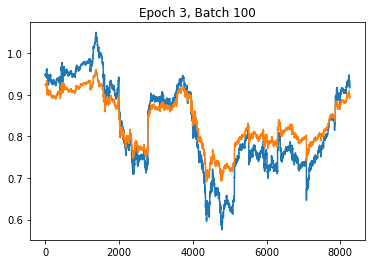

Epoch:3, Batch:101, MSE:0.00010217115
Epoch:3, Batch:102, MSE:0.00027998805
Epoch:3, Batch:103, MSE:0.00046311552
Epoch:3, Batch:104, MSE:0.00034606294
Epoch:3, Batch:105, MSE:0.000102296435
(1, 8254)
(8254,)


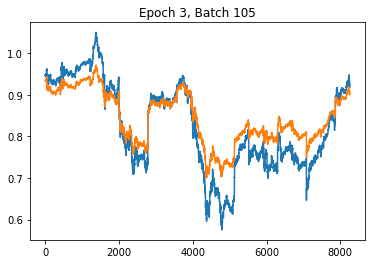

Epoch:3, Batch:106, MSE:0.00023076843
Epoch:3, Batch:107, MSE:0.00042822427
Epoch:3, Batch:108, MSE:0.00027715013
Epoch:3, Batch:109, MSE:9.497016e-05
Epoch:3, Batch:110, MSE:0.0005391913
(1, 8254)
(8254,)


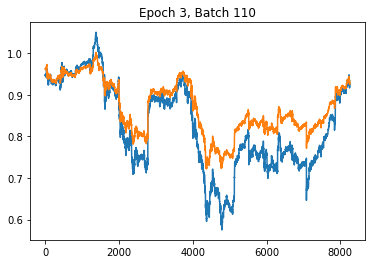

Epoch:3, Batch:111, MSE:0.00085707474
Epoch:3, Batch:112, MSE:0.00044048304
Epoch:3, Batch:113, MSE:0.00011315731
Epoch:3, Batch:114, MSE:0.00053941034
Epoch:3, Batch:115, MSE:0.0007792664
(1, 8254)
(8254,)


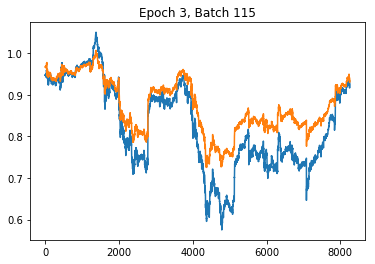

Epoch:3, Batch:116, MSE:0.00046510226
Epoch:3, Batch:117, MSE:0.00015329212
Epoch:3, Batch:118, MSE:0.00038071716
Epoch:3, Batch:119, MSE:0.0006662248
Epoch:3, Batch:120, MSE:0.00027691765
(1, 8254)
(8254,)


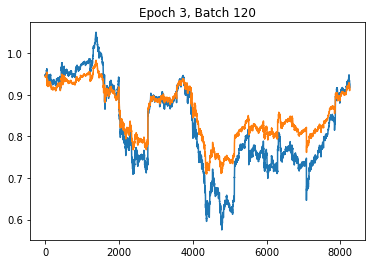

Epoch:3, Batch:121, MSE:0.00014884154
Epoch:3, Batch:122, MSE:0.000337161
Epoch:3, Batch:123, MSE:0.0004060557
Epoch:3, Batch:124, MSE:0.00020662023
Epoch:3, Batch:125, MSE:0.00013175784
(1, 8254)
(8254,)


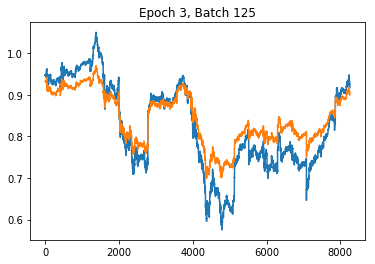

Epoch:3, Batch:126, MSE:0.00015515508
Epoch:3, Batch:127, MSE:9.766828e-05
Epoch:4, Batch:0, MSE:0.0001213955
(1, 8254)
(8254,)


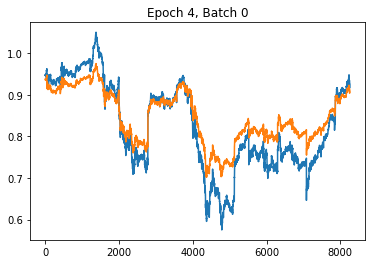

Epoch:4, Batch:1, MSE:9.91841e-05
Epoch:4, Batch:2, MSE:0.00013099107
Epoch:4, Batch:3, MSE:0.000112094654
Epoch:4, Batch:4, MSE:0.000121942125
Epoch:4, Batch:5, MSE:0.0001389154
(1, 8254)
(8254,)


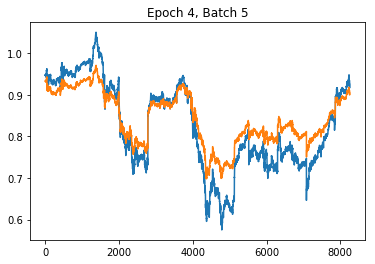

Epoch:4, Batch:6, MSE:0.0001661428
Epoch:4, Batch:7, MSE:0.00013705468
Epoch:4, Batch:8, MSE:0.00016076771
Epoch:4, Batch:9, MSE:0.00011336821
Epoch:4, Batch:10, MSE:8.2796614e-05
(1, 8254)
(8254,)


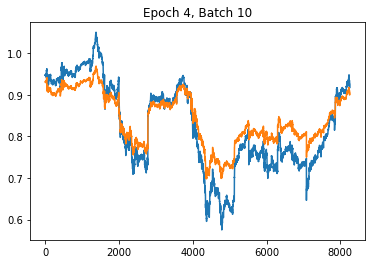

Epoch:4, Batch:11, MSE:0.00016790768
Epoch:4, Batch:12, MSE:0.00021352402
Epoch:4, Batch:13, MSE:0.00012590952
Epoch:4, Batch:14, MSE:0.000112200345
Epoch:4, Batch:15, MSE:0.00027252908
(1, 8254)
(8254,)


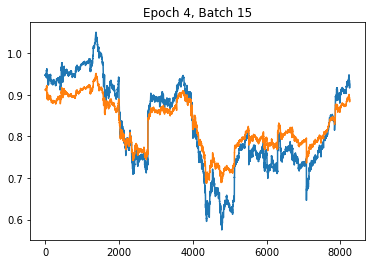

Epoch:4, Batch:16, MSE:0.00033801643
Epoch:4, Batch:17, MSE:0.00016282561
Epoch:4, Batch:18, MSE:0.000102098114
Epoch:4, Batch:19, MSE:0.00012163345
Epoch:4, Batch:20, MSE:0.00014967675
(1, 8254)
(8254,)


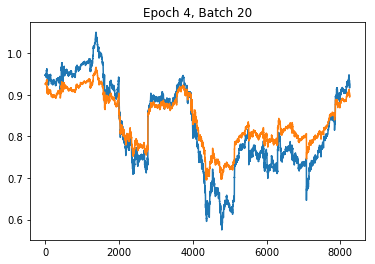

Epoch:4, Batch:21, MSE:0.000112064416
Epoch:4, Batch:22, MSE:9.3018694e-05
Epoch:4, Batch:23, MSE:0.00014501998
Epoch:4, Batch:24, MSE:0.00020431925
Epoch:4, Batch:25, MSE:0.00012098432
(1, 8254)
(8254,)


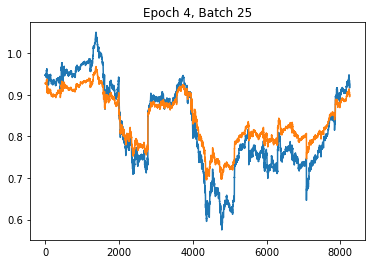

Epoch:4, Batch:26, MSE:9.0680755e-05
Epoch:4, Batch:27, MSE:9.428033e-05
Epoch:4, Batch:28, MSE:0.00013879682
Epoch:4, Batch:29, MSE:0.00016520651
Epoch:4, Batch:30, MSE:0.00011279284
(1, 8254)
(8254,)


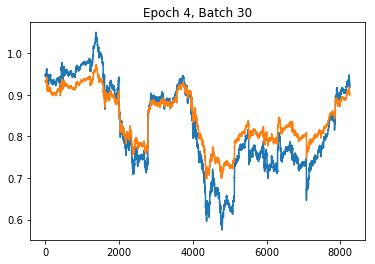

Epoch:4, Batch:31, MSE:9.7045246e-05
Epoch:4, Batch:32, MSE:9.159352e-05
Epoch:4, Batch:33, MSE:0.000112137765
Epoch:4, Batch:34, MSE:8.806019e-05
Epoch:4, Batch:35, MSE:9.882021e-05
(1, 8254)
(8254,)


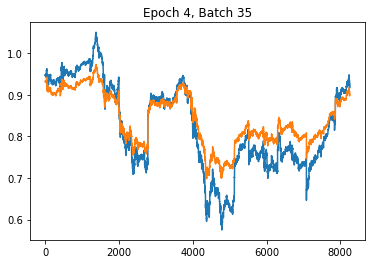

Epoch:4, Batch:36, MSE:0.000128529
Epoch:4, Batch:37, MSE:0.00017952413
Epoch:4, Batch:38, MSE:0.00014575988
Epoch:4, Batch:39, MSE:0.00010558424
Epoch:4, Batch:40, MSE:0.00010668888
(1, 8254)
(8254,)


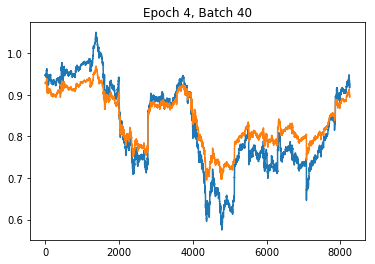

Epoch:4, Batch:41, MSE:0.00018973862
Epoch:4, Batch:42, MSE:0.00022713045
Epoch:4, Batch:43, MSE:0.00013711391
Epoch:4, Batch:44, MSE:8.208814e-05
Epoch:4, Batch:45, MSE:0.0001351761
(1, 8254)
(8254,)


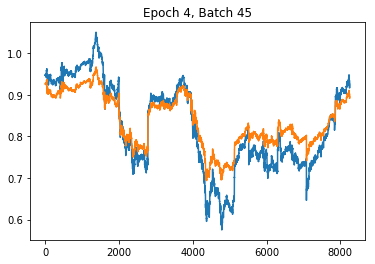

Epoch:4, Batch:46, MSE:0.00018671586
Epoch:4, Batch:47, MSE:0.00014954193
Epoch:4, Batch:48, MSE:7.528498e-05
Epoch:4, Batch:49, MSE:0.00016041055
Epoch:4, Batch:50, MSE:0.00019871669
(1, 8254)
(8254,)


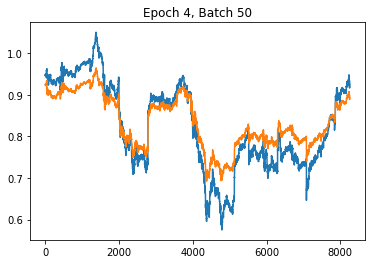

Epoch:4, Batch:51, MSE:0.000113006136
Epoch:4, Batch:52, MSE:7.921102e-05
Epoch:4, Batch:53, MSE:8.400827e-05
Epoch:4, Batch:54, MSE:8.174501e-05
Epoch:4, Batch:55, MSE:0.00010583591
(1, 8254)
(8254,)


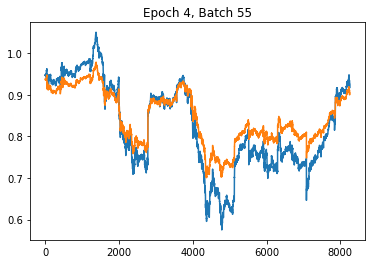

Epoch:4, Batch:56, MSE:8.440489e-05
Epoch:4, Batch:57, MSE:9.026172e-05
Epoch:4, Batch:58, MSE:7.512277e-05
Epoch:4, Batch:59, MSE:8.185776e-05
Epoch:4, Batch:60, MSE:9.358885e-05
(1, 8254)
(8254,)


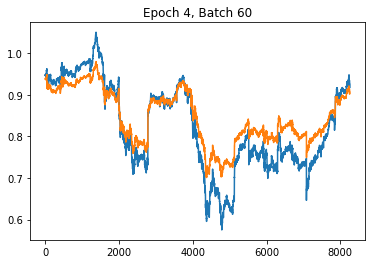

Epoch:4, Batch:61, MSE:8.514562e-05
Epoch:4, Batch:62, MSE:0.00012963008
Epoch:4, Batch:63, MSE:0.00012350583
Epoch:4, Batch:64, MSE:8.856399e-05
Epoch:4, Batch:65, MSE:9.886223e-05
(1, 8254)
(8254,)


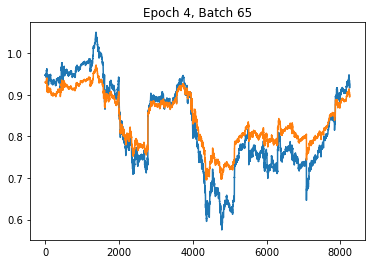

Epoch:4, Batch:66, MSE:0.00013306954
Epoch:4, Batch:67, MSE:0.00014998968
Epoch:4, Batch:68, MSE:0.00017604363
Epoch:4, Batch:69, MSE:0.00014561648
Epoch:4, Batch:70, MSE:8.5626656e-05
(1, 8254)
(8254,)


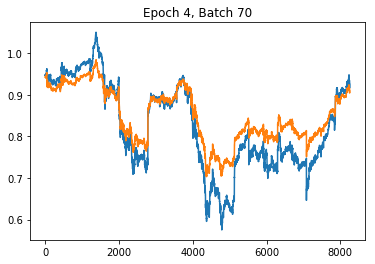

Epoch:4, Batch:71, MSE:8.258424e-05
Epoch:4, Batch:72, MSE:8.2871935e-05
Epoch:4, Batch:73, MSE:8.702777e-05
Epoch:4, Batch:74, MSE:0.00010093047
Epoch:4, Batch:75, MSE:9.81787e-05
(1, 8254)
(8254,)


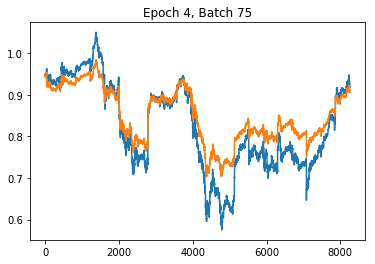

Epoch:4, Batch:76, MSE:0.000104226245
Epoch:4, Batch:77, MSE:6.3969266e-05
Epoch:4, Batch:78, MSE:7.222984e-05
Epoch:4, Batch:79, MSE:9.259384e-05
Epoch:4, Batch:80, MSE:8.921392e-05
(1, 8254)
(8254,)


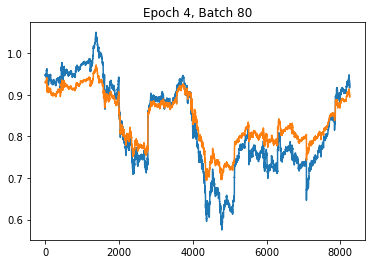

Epoch:4, Batch:81, MSE:0.000101439495
Epoch:4, Batch:82, MSE:6.977163e-05
Epoch:4, Batch:83, MSE:7.795611e-05
Epoch:4, Batch:84, MSE:0.00010054665
Epoch:4, Batch:85, MSE:8.38859e-05
(1, 8254)
(8254,)


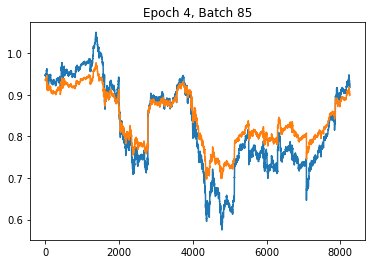

Epoch:4, Batch:86, MSE:8.68466e-05
Epoch:4, Batch:87, MSE:8.1485865e-05
Epoch:4, Batch:88, MSE:0.00012348418
Epoch:4, Batch:89, MSE:0.00013916894
Epoch:4, Batch:90, MSE:0.00015148401
(1, 8254)
(8254,)


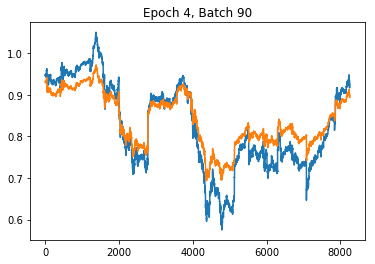

Epoch:4, Batch:91, MSE:0.00014481405
Epoch:4, Batch:92, MSE:0.00017479311
Epoch:4, Batch:93, MSE:0.00018495254
Epoch:4, Batch:94, MSE:0.0001493381
Epoch:4, Batch:95, MSE:0.00012994648
(1, 8254)
(8254,)


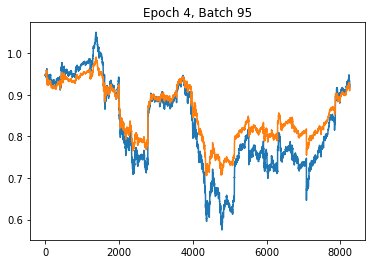

Epoch:4, Batch:96, MSE:7.776356e-05
Epoch:4, Batch:97, MSE:9.972519e-05
Epoch:4, Batch:98, MSE:8.53384e-05
Epoch:4, Batch:99, MSE:0.000112128895
Epoch:4, Batch:100, MSE:0.00014056255
(1, 8254)
(8254,)


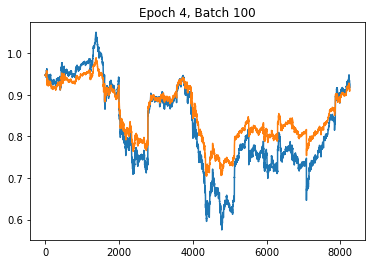

Epoch:4, Batch:101, MSE:0.00014926541
Epoch:4, Batch:102, MSE:8.7774446e-05
Epoch:4, Batch:103, MSE:9.167716e-05
Epoch:4, Batch:104, MSE:0.00010725471
Epoch:4, Batch:105, MSE:0.00013977397
(1, 8254)
(8254,)


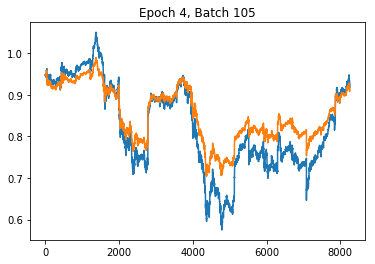

Epoch:4, Batch:106, MSE:0.00015988809
Epoch:4, Batch:107, MSE:0.00019012281
Epoch:4, Batch:108, MSE:0.00021256277
Epoch:4, Batch:109, MSE:0.00029482145
Epoch:4, Batch:110, MSE:0.0003233744
(1, 8254)
(8254,)


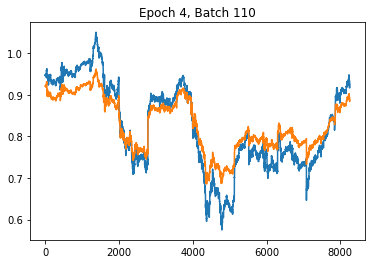

Epoch:4, Batch:111, MSE:0.00041920278
Epoch:4, Batch:112, MSE:0.00042113347
Epoch:4, Batch:113, MSE:0.00026989798
Epoch:4, Batch:114, MSE:0.000101291094
Epoch:4, Batch:115, MSE:8.5840424e-05
(1, 8254)
(8254,)


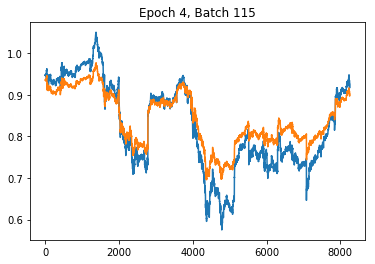

Epoch:4, Batch:116, MSE:0.00017905976
Epoch:4, Batch:117, MSE:0.00027158557
Epoch:4, Batch:118, MSE:0.00037685083
Epoch:4, Batch:119, MSE:0.00028117734
Epoch:4, Batch:120, MSE:0.00018326467
(1, 8254)
(8254,)


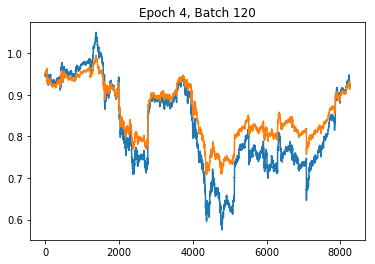

Epoch:4, Batch:121, MSE:0.00010484082
Epoch:4, Batch:122, MSE:8.0939826e-05
Epoch:4, Batch:123, MSE:0.00018777473
Epoch:4, Batch:124, MSE:0.0003073885
Epoch:4, Batch:125, MSE:0.0005145343
(1, 8254)
(8254,)


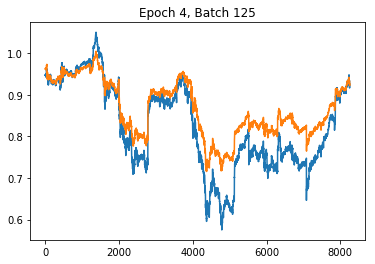

Epoch:4, Batch:126, MSE:0.00065296015
Epoch:4, Batch:127, MSE:0.0007411064
Epoch:5, Batch:0, MSE:0.0005855056
(1, 8254)
(8254,)


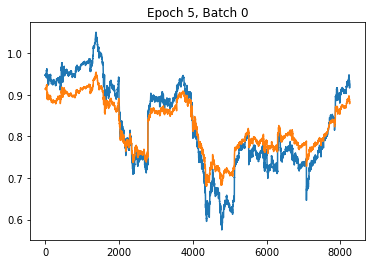

Epoch:5, Batch:1, MSE:0.00016864864
Epoch:5, Batch:2, MSE:9.010009e-05
Epoch:5, Batch:3, MSE:0.00031977406
Epoch:5, Batch:4, MSE:0.0005433665
Epoch:5, Batch:5, MSE:0.0005663545
(1, 8254)
(8254,)


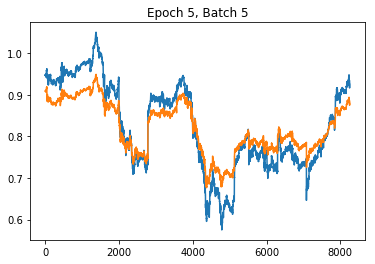

Epoch:5, Batch:6, MSE:0.0003315836
Epoch:5, Batch:7, MSE:0.000111855436
Epoch:5, Batch:8, MSE:0.00011013879
Epoch:5, Batch:9, MSE:0.00017967442
Epoch:5, Batch:10, MSE:0.00032894933
(1, 8254)
(8254,)


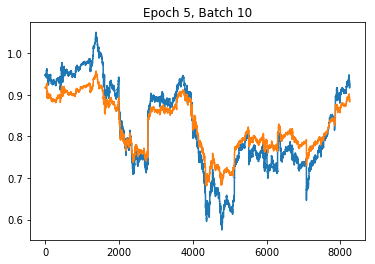

Epoch:5, Batch:11, MSE:0.0003760895
Epoch:5, Batch:12, MSE:0.00024248073
Epoch:5, Batch:13, MSE:8.826428e-05
Epoch:5, Batch:14, MSE:0.00013872232
Epoch:5, Batch:15, MSE:0.00026118252
(1, 8254)
(8254,)


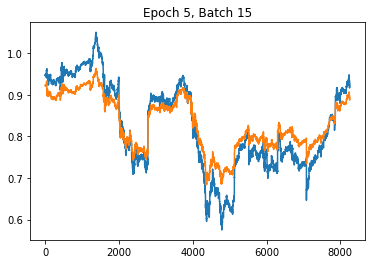

Epoch:5, Batch:16, MSE:0.00024429424
Epoch:5, Batch:17, MSE:0.00013896519
Epoch:5, Batch:18, MSE:9.802767e-05
Epoch:5, Batch:19, MSE:8.959006e-05
Epoch:5, Batch:20, MSE:0.00012375643
(1, 8254)
(8254,)


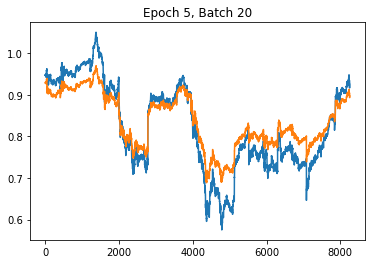

Epoch:5, Batch:21, MSE:0.00014136918
Epoch:5, Batch:22, MSE:8.4073436e-05
Epoch:5, Batch:23, MSE:7.335044e-05
Epoch:5, Batch:24, MSE:8.159551e-05
Epoch:5, Batch:25, MSE:0.00010807601
(1, 8254)
(8254,)


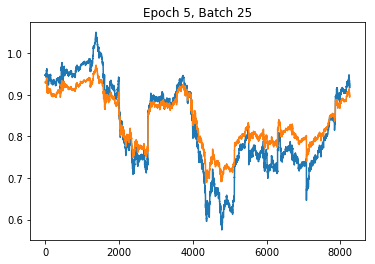

Epoch:5, Batch:26, MSE:0.00027390453
Epoch:5, Batch:27, MSE:0.0003816121
Epoch:5, Batch:28, MSE:0.00047732488
Epoch:5, Batch:29, MSE:0.00034129072
Epoch:5, Batch:30, MSE:0.00015133529
(1, 8254)
(8254,)


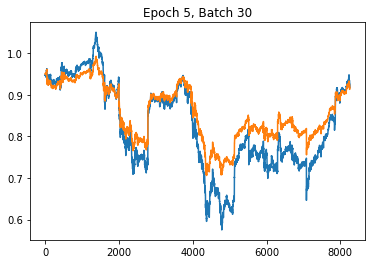

Epoch:5, Batch:31, MSE:7.737647e-05
Epoch:5, Batch:32, MSE:0.00018594872
Epoch:5, Batch:33, MSE:0.00033504303
Epoch:5, Batch:34, MSE:0.00024029707
Epoch:5, Batch:35, MSE:0.00010365889
(1, 8254)
(8254,)


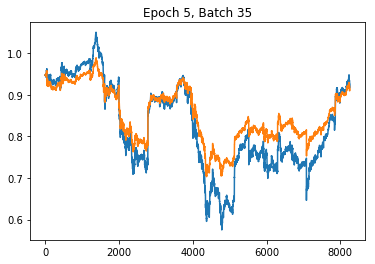

Epoch:5, Batch:36, MSE:0.00011829212
Epoch:5, Batch:37, MSE:0.00032317353
Epoch:5, Batch:38, MSE:0.00025626452
Epoch:5, Batch:39, MSE:9.508396e-05
Epoch:5, Batch:40, MSE:8.389997e-05
(1, 8254)
(8254,)


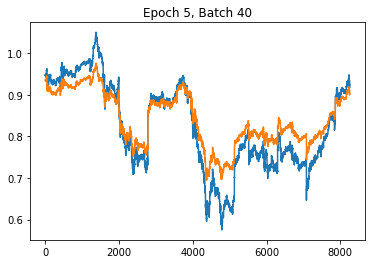

Epoch:5, Batch:41, MSE:0.00014411798
Epoch:5, Batch:42, MSE:0.00026992062
Epoch:5, Batch:43, MSE:0.00030706986
Epoch:5, Batch:44, MSE:0.0001656517
Epoch:5, Batch:45, MSE:9.207899e-05
(1, 8254)
(8254,)


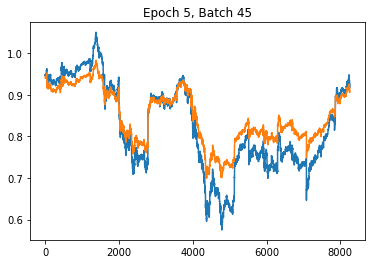

Epoch:5, Batch:46, MSE:0.00019014555
Epoch:5, Batch:47, MSE:0.00044470292
Epoch:5, Batch:48, MSE:0.00047719583
Epoch:5, Batch:49, MSE:0.00026683172
Epoch:5, Batch:50, MSE:0.00013935476
(1, 8254)
(8254,)


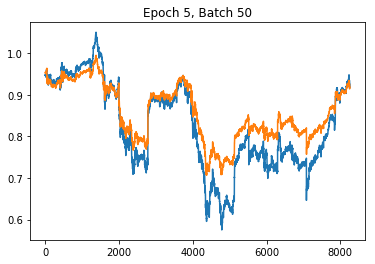

Epoch:5, Batch:51, MSE:7.9146455e-05
Epoch:5, Batch:52, MSE:0.00018202019
Epoch:5, Batch:53, MSE:0.00029898802
Epoch:5, Batch:54, MSE:0.00019283163
Epoch:5, Batch:55, MSE:0.00011430696
(1, 8254)
(8254,)


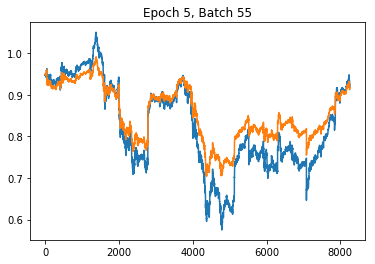

Epoch:5, Batch:56, MSE:7.7676996e-05
Epoch:5, Batch:57, MSE:7.056698e-05
Epoch:5, Batch:58, MSE:0.00017178415
Epoch:5, Batch:59, MSE:0.00030486868
Epoch:5, Batch:60, MSE:0.00044186483
(1, 8254)
(8254,)


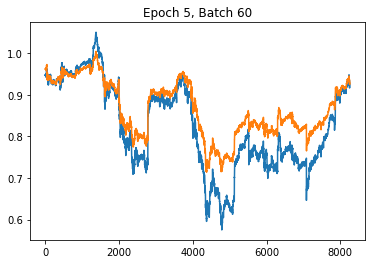

Epoch:5, Batch:61, MSE:0.00040373526
Epoch:5, Batch:62, MSE:0.0002720678
Epoch:5, Batch:63, MSE:0.00020708433
Epoch:5, Batch:64, MSE:0.000104581835
Epoch:5, Batch:65, MSE:8.131995e-05
(1, 8254)
(8254,)


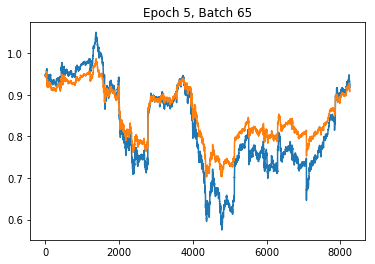

Epoch:5, Batch:66, MSE:0.00023453642
Epoch:5, Batch:67, MSE:0.000404719
Epoch:5, Batch:68, MSE:0.00042186715
Epoch:5, Batch:69, MSE:0.00032090943
Epoch:5, Batch:70, MSE:0.00015476502
(1, 8254)
(8254,)


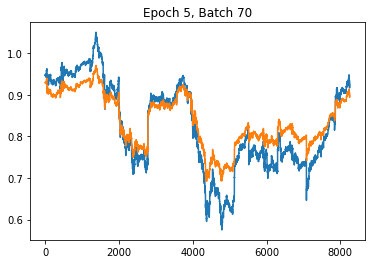

Epoch:5, Batch:71, MSE:6.65232e-05
Epoch:5, Batch:72, MSE:0.00019382275
Epoch:5, Batch:73, MSE:0.0004456964
Epoch:5, Batch:74, MSE:0.00047556503
Epoch:5, Batch:75, MSE:0.00027685863
(1, 8254)
(8254,)


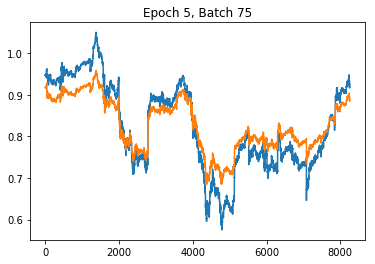

Epoch:5, Batch:76, MSE:0.00010397746
Epoch:5, Batch:77, MSE:8.664762e-05
Epoch:5, Batch:78, MSE:0.00017793287
Epoch:5, Batch:79, MSE:0.00026591547
Epoch:5, Batch:80, MSE:0.0002170022
(1, 8254)
(8254,)


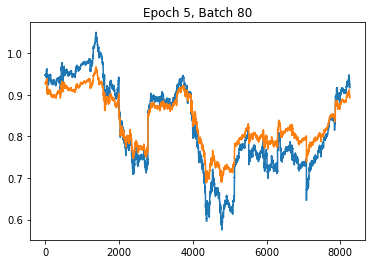

Epoch:5, Batch:81, MSE:8.262636e-05
Epoch:5, Batch:82, MSE:0.0001458549
Epoch:5, Batch:83, MSE:0.00025384646
Epoch:5, Batch:84, MSE:0.0001808358
Epoch:5, Batch:85, MSE:0.00010439445
(1, 8254)
(8254,)


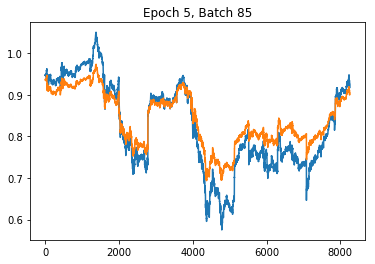

Epoch:5, Batch:86, MSE:8.1087055e-05
Epoch:5, Batch:87, MSE:0.00016840355
Epoch:5, Batch:88, MSE:0.00016287975
Epoch:5, Batch:89, MSE:0.00011016317
Epoch:5, Batch:90, MSE:8.316543e-05
(1, 8254)
(8254,)


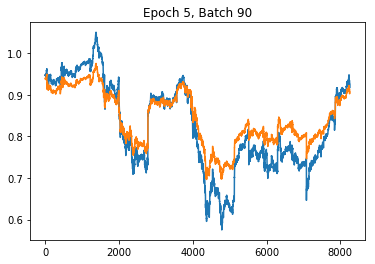

Epoch:5, Batch:91, MSE:0.000107180895
Epoch:5, Batch:92, MSE:0.000113097245
Epoch:5, Batch:93, MSE:9.0917616e-05
Epoch:5, Batch:94, MSE:7.279079e-05
Epoch:5, Batch:95, MSE:7.766245e-05
(1, 8254)
(8254,)


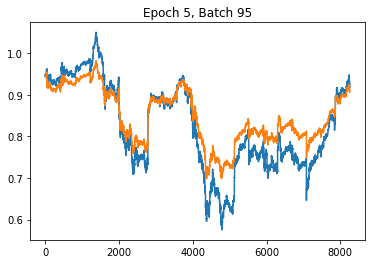

Epoch:5, Batch:96, MSE:9.074423e-05
Epoch:5, Batch:97, MSE:0.00012232464
Epoch:5, Batch:98, MSE:0.00011199681
Epoch:5, Batch:99, MSE:7.041966e-05
Epoch:5, Batch:100, MSE:6.974088e-05
(1, 8254)
(8254,)


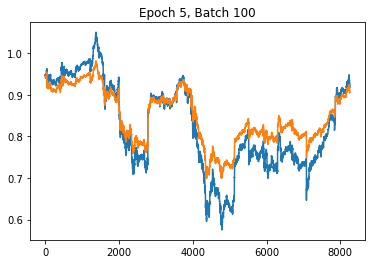

Epoch:5, Batch:101, MSE:0.00010921415
Epoch:5, Batch:102, MSE:0.00012366759
Epoch:5, Batch:103, MSE:0.00010110895
Epoch:5, Batch:104, MSE:0.000102511025
Epoch:5, Batch:105, MSE:0.00015894152
(1, 8254)
(8254,)


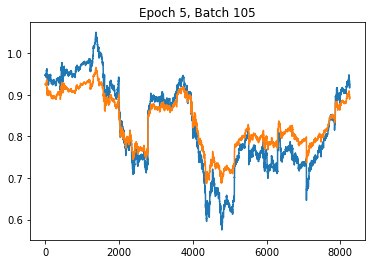

Epoch:5, Batch:106, MSE:0.00020655122
Epoch:5, Batch:107, MSE:0.00018154856
Epoch:5, Batch:108, MSE:0.00013130828
Epoch:5, Batch:109, MSE:0.00011026923
Epoch:5, Batch:110, MSE:8.7284716e-05
(1, 8254)
(8254,)


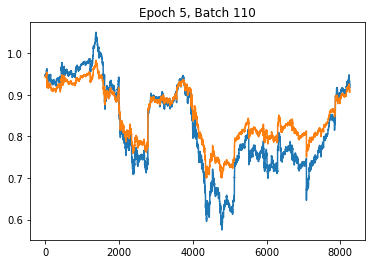

Epoch:5, Batch:111, MSE:8.736265e-05
Epoch:5, Batch:112, MSE:7.504887e-05
Epoch:5, Batch:113, MSE:7.253474e-05
Epoch:5, Batch:114, MSE:9.606395e-05
Epoch:5, Batch:115, MSE:0.00018430655
(1, 8254)
(8254,)


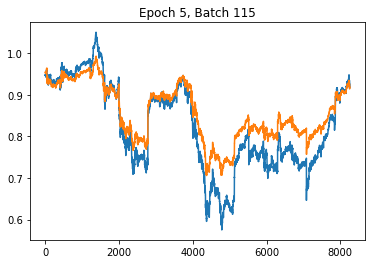

Epoch:5, Batch:116, MSE:0.00035090162
Epoch:5, Batch:117, MSE:0.0003377465
Epoch:5, Batch:118, MSE:0.00017850794
Epoch:5, Batch:119, MSE:5.9548143e-05
Epoch:5, Batch:120, MSE:0.00010996615
(1, 8254)
(8254,)


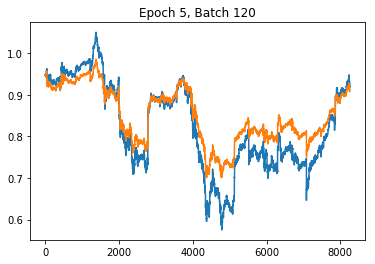

Epoch:5, Batch:121, MSE:0.00018776077
Epoch:5, Batch:122, MSE:0.00018527283
Epoch:5, Batch:123, MSE:0.00023693747
Epoch:5, Batch:124, MSE:0.00021733873
Epoch:5, Batch:125, MSE:0.00013071431
(1, 8254)
(8254,)


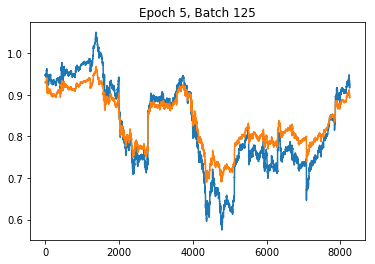

Epoch:5, Batch:126, MSE:6.962023e-05
Epoch:5, Batch:127, MSE:9.1607275e-05
Epoch:6, Batch:0, MSE:0.00011167071
(1, 8254)
(8254,)


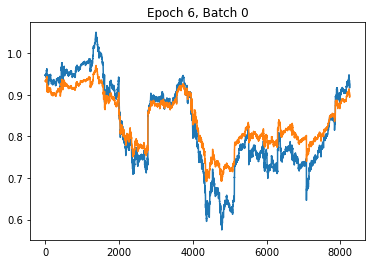

Epoch:6, Batch:1, MSE:0.00014943919
Epoch:6, Batch:2, MSE:0.00010544016
Epoch:6, Batch:3, MSE:9.3287366e-05
Epoch:6, Batch:4, MSE:6.486848e-05
Epoch:6, Batch:5, MSE:9.589263e-05
(1, 8254)
(8254,)


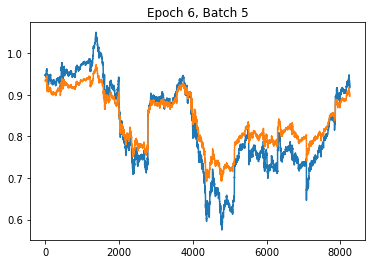

Epoch:6, Batch:6, MSE:9.289706e-05
Epoch:6, Batch:7, MSE:5.84201e-05
Epoch:6, Batch:8, MSE:7.214499e-05
Epoch:6, Batch:9, MSE:0.0001642298
Epoch:6, Batch:10, MSE:0.00023363644
(1, 8254)
(8254,)


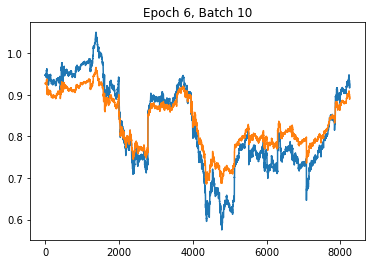

Epoch:6, Batch:11, MSE:0.00018917455
Epoch:6, Batch:12, MSE:9.958683e-05
Epoch:6, Batch:13, MSE:6.803013e-05
Epoch:6, Batch:14, MSE:0.00013406185
Epoch:6, Batch:15, MSE:0.00019273417
(1, 8254)
(8254,)


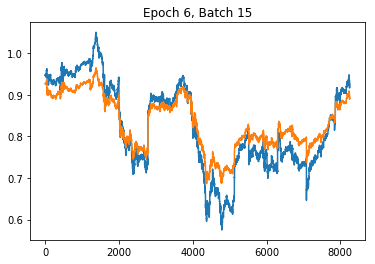

Epoch:6, Batch:16, MSE:0.00014801312
Epoch:6, Batch:17, MSE:0.000106391104
Epoch:6, Batch:18, MSE:6.382911e-05
Epoch:6, Batch:19, MSE:6.1442996e-05
Epoch:6, Batch:20, MSE:6.84831e-05
(1, 8254)
(8254,)


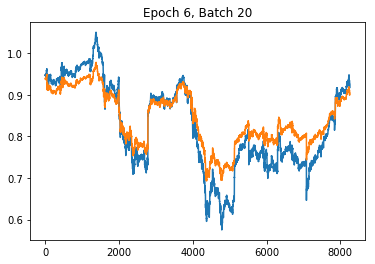

Epoch:6, Batch:21, MSE:7.5032454e-05
Epoch:6, Batch:22, MSE:5.8084297e-05
Epoch:6, Batch:23, MSE:4.8435657e-05
Epoch:6, Batch:24, MSE:6.326684e-05
Epoch:6, Batch:25, MSE:6.532062e-05
(1, 8254)
(8254,)


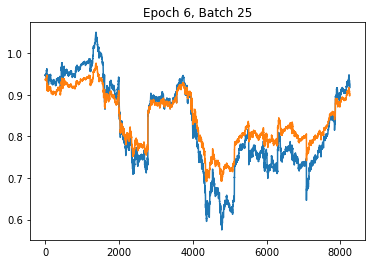

Epoch:6, Batch:26, MSE:9.881356e-05
Epoch:6, Batch:27, MSE:0.00022452313
Epoch:6, Batch:28, MSE:0.0003900229
Epoch:6, Batch:29, MSE:0.0005160925
Epoch:6, Batch:30, MSE:0.00053142454
(1, 8254)
(8254,)


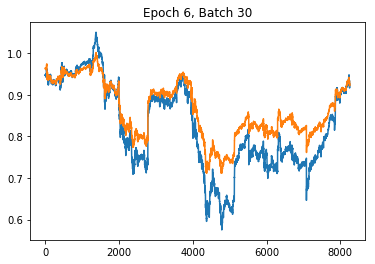

Epoch:6, Batch:31, MSE:0.00048313168
Epoch:6, Batch:32, MSE:0.00021817899
Epoch:6, Batch:33, MSE:5.2404623e-05
Epoch:6, Batch:34, MSE:0.00015847076
Epoch:6, Batch:35, MSE:0.00025800604
(1, 8254)
(8254,)


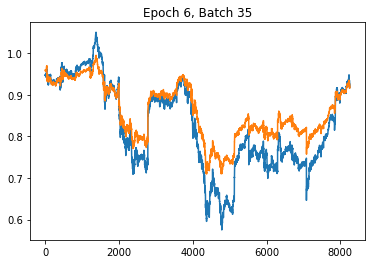

Epoch:6, Batch:36, MSE:0.0002610674
Epoch:6, Batch:37, MSE:0.00022968877
Epoch:6, Batch:38, MSE:0.00017042371
Epoch:6, Batch:39, MSE:7.116471e-05
Epoch:6, Batch:40, MSE:9.015543e-05
(1, 8254)
(8254,)


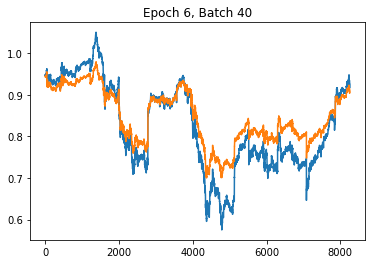

Epoch:6, Batch:41, MSE:0.00018413
Epoch:6, Batch:42, MSE:0.00022658924
Epoch:6, Batch:43, MSE:0.00022173073
Epoch:6, Batch:44, MSE:0.00019454496
Epoch:6, Batch:45, MSE:0.00016936011
(1, 8254)
(8254,)


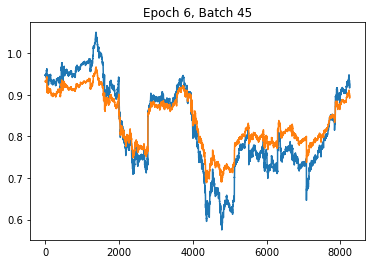

Epoch:6, Batch:46, MSE:7.710396e-05
Epoch:6, Batch:47, MSE:0.00018788435
Epoch:6, Batch:48, MSE:0.0005211891
Epoch:6, Batch:49, MSE:0.000738472
Epoch:6, Batch:50, MSE:0.0007014771
(1, 8254)
(8254,)


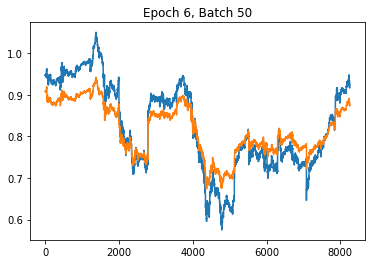

Epoch:6, Batch:51, MSE:0.0002764947
Epoch:6, Batch:52, MSE:6.521061e-05
Epoch:6, Batch:53, MSE:0.0001749725
Epoch:6, Batch:54, MSE:0.000326638
Epoch:6, Batch:55, MSE:0.00042514212
(1, 8254)
(8254,)


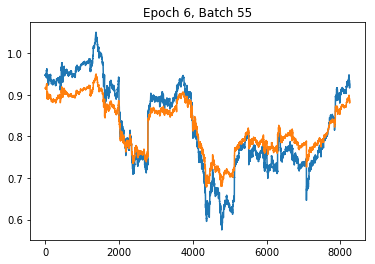

Epoch:6, Batch:56, MSE:0.00030719687
Epoch:6, Batch:57, MSE:0.0001234597
Epoch:6, Batch:58, MSE:7.667583e-05
Epoch:6, Batch:59, MSE:0.0001998506
Epoch:6, Batch:60, MSE:0.00033157997
(1, 8254)
(8254,)


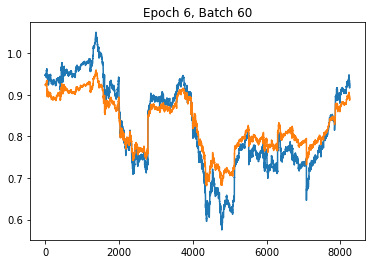

Epoch:6, Batch:61, MSE:0.00045657216
Epoch:6, Batch:62, MSE:0.00047857536
Epoch:6, Batch:63, MSE:0.00022277798
Epoch:6, Batch:64, MSE:6.33741e-05
Epoch:6, Batch:65, MSE:0.00013667103
(1, 8254)
(8254,)


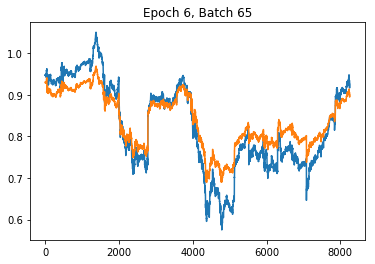

Epoch:6, Batch:66, MSE:0.00037406784
Epoch:6, Batch:67, MSE:0.0002907029
Epoch:6, Batch:68, MSE:0.000112449336
Epoch:6, Batch:69, MSE:7.282637e-05
Epoch:6, Batch:70, MSE:0.00014819855
(1, 8254)
(8254,)


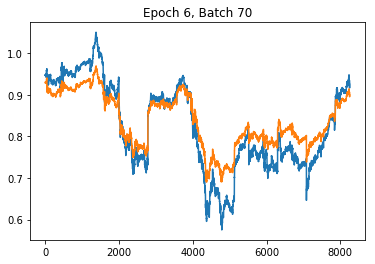

Epoch:6, Batch:71, MSE:0.00022115448
Epoch:6, Batch:72, MSE:0.00014954123
Epoch:6, Batch:73, MSE:9.1080634e-05
Epoch:6, Batch:74, MSE:5.542308e-05
Epoch:6, Batch:75, MSE:9.365542e-05
(1, 8254)
(8254,)


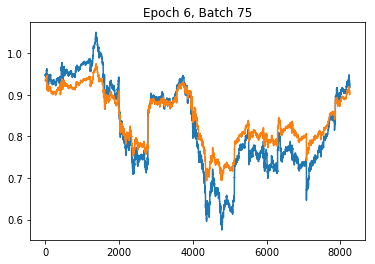

Epoch:6, Batch:76, MSE:0.0001391755
Epoch:6, Batch:77, MSE:0.00019313872
Epoch:6, Batch:78, MSE:0.00016087414
Epoch:6, Batch:79, MSE:0.000107305576
Epoch:6, Batch:80, MSE:7.474238e-05
(1, 8254)
(8254,)


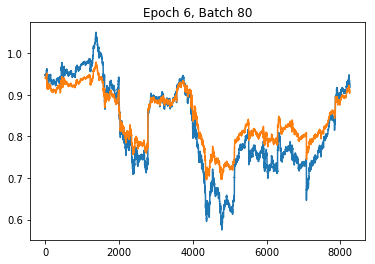

Epoch:6, Batch:81, MSE:0.0001485426
Epoch:6, Batch:82, MSE:0.00016324455
Epoch:6, Batch:83, MSE:9.921819e-05
Epoch:6, Batch:84, MSE:6.7361805e-05
Epoch:6, Batch:85, MSE:0.000100176956
(1, 8254)
(8254,)


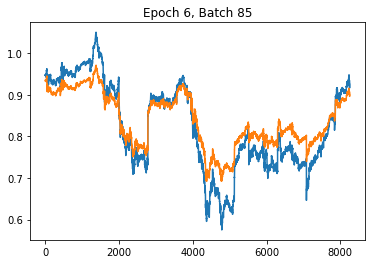

Epoch:6, Batch:86, MSE:0.000115389754
Epoch:6, Batch:87, MSE:8.2032304e-05
Epoch:6, Batch:88, MSE:6.493868e-05
Epoch:6, Batch:89, MSE:6.6935136e-05
Epoch:6, Batch:90, MSE:5.8987156e-05
(1, 8254)
(8254,)


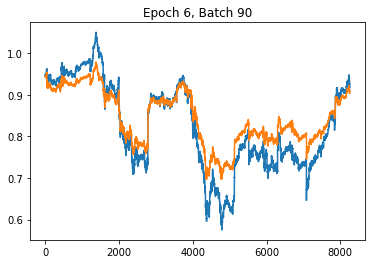

Epoch:6, Batch:91, MSE:6.51995e-05
Epoch:6, Batch:92, MSE:5.8301724e-05
Epoch:6, Batch:93, MSE:5.233204e-05
Epoch:6, Batch:94, MSE:7.6008364e-05
Epoch:6, Batch:95, MSE:6.4719134e-05
(1, 8254)
(8254,)


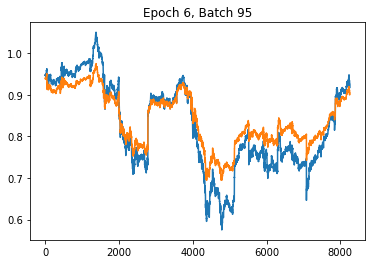

Epoch:6, Batch:96, MSE:5.618043e-05
Epoch:6, Batch:97, MSE:5.712364e-05
Epoch:6, Batch:98, MSE:7.0792084e-05
Epoch:6, Batch:99, MSE:6.167001e-05
Epoch:6, Batch:100, MSE:5.8609276e-05
(1, 8254)
(8254,)


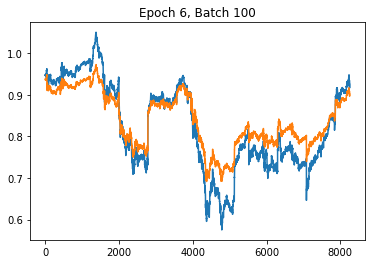

Epoch:6, Batch:101, MSE:6.156509e-05
Epoch:6, Batch:102, MSE:6.3014784e-05
Epoch:6, Batch:103, MSE:7.328537e-05
Epoch:6, Batch:104, MSE:8.8469955e-05
Epoch:6, Batch:105, MSE:8.6553875e-05
(1, 8254)
(8254,)


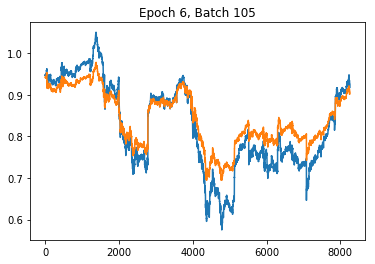

Epoch:6, Batch:106, MSE:8.518315e-05
Epoch:6, Batch:107, MSE:0.00012550145
Epoch:6, Batch:108, MSE:0.000108431224
Epoch:6, Batch:109, MSE:0.000105837535
Epoch:6, Batch:110, MSE:6.849934e-05
(1, 8254)
(8254,)


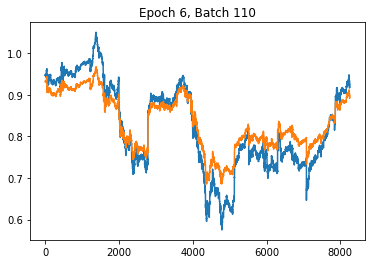

Epoch:6, Batch:111, MSE:5.0682145e-05
Epoch:6, Batch:112, MSE:0.000111276415
Epoch:6, Batch:113, MSE:0.00013065638
Epoch:6, Batch:114, MSE:8.266594e-05
Epoch:6, Batch:115, MSE:6.394947e-05
(1, 8254)
(8254,)


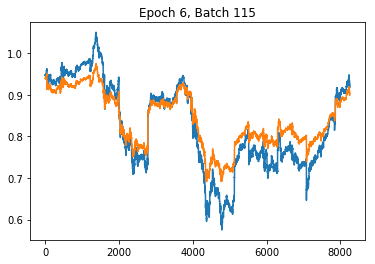

Epoch:6, Batch:116, MSE:8.0600905e-05
Epoch:6, Batch:117, MSE:9.2550035e-05
Epoch:6, Batch:118, MSE:0.000101033635
Epoch:6, Batch:119, MSE:8.493733e-05
Epoch:6, Batch:120, MSE:7.9711695e-05
(1, 8254)
(8254,)


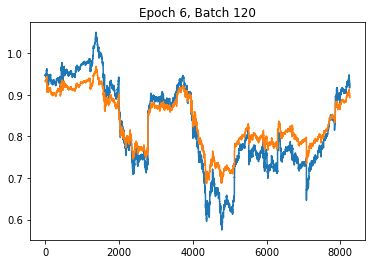

Epoch:6, Batch:121, MSE:7.496793e-05
Epoch:6, Batch:122, MSE:5.2859657e-05
Epoch:6, Batch:123, MSE:6.873985e-05
Epoch:6, Batch:124, MSE:0.00010396575
Epoch:6, Batch:125, MSE:0.00012096524
(1, 8254)
(8254,)


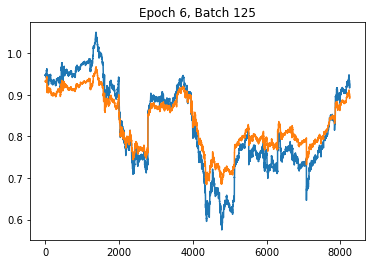

Epoch:6, Batch:126, MSE:0.00013544466
Epoch:6, Batch:127, MSE:0.00012563534
Epoch:7, Batch:0, MSE:0.0001381365
(1, 8254)
(8254,)


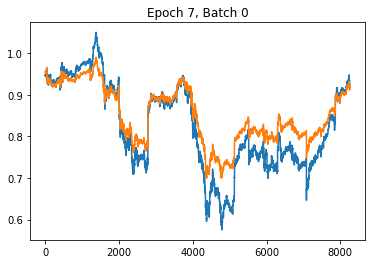

Epoch:7, Batch:1, MSE:0.00013799909
Epoch:7, Batch:2, MSE:8.987141e-05
Epoch:7, Batch:3, MSE:8.280188e-05
Epoch:7, Batch:4, MSE:5.4452852e-05
Epoch:7, Batch:5, MSE:4.968643e-05
(1, 8254)
(8254,)


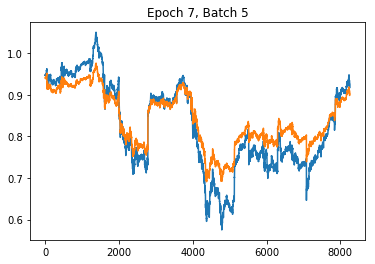

Epoch:7, Batch:6, MSE:6.267784e-05
Epoch:7, Batch:7, MSE:5.521547e-05
Epoch:7, Batch:8, MSE:5.8900114e-05
Epoch:7, Batch:9, MSE:8.899582e-05
Epoch:7, Batch:10, MSE:9.883495e-05
(1, 8254)
(8254,)


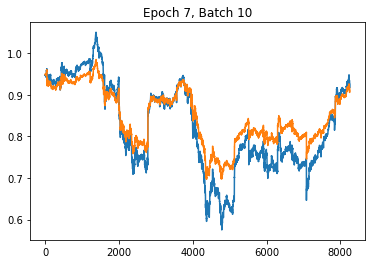

Epoch:7, Batch:11, MSE:0.00013180956
Epoch:7, Batch:12, MSE:0.00014566633
Epoch:7, Batch:13, MSE:0.00019932815
Epoch:7, Batch:14, MSE:0.00018873136
Epoch:7, Batch:15, MSE:0.00011901868
(1, 8254)
(8254,)


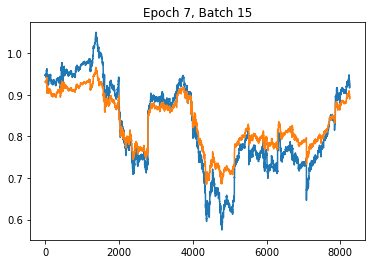

Epoch:7, Batch:16, MSE:0.000117670264
Epoch:7, Batch:17, MSE:0.00014111021
Epoch:7, Batch:18, MSE:0.00012693758
Epoch:7, Batch:19, MSE:9.094119e-05
Epoch:7, Batch:20, MSE:5.023848e-05
(1, 8254)
(8254,)


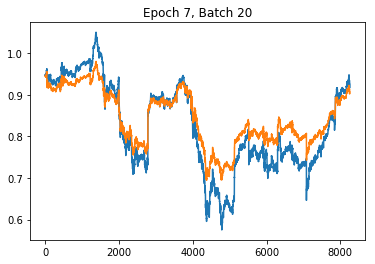

Epoch:7, Batch:21, MSE:9.070262e-05
Epoch:7, Batch:22, MSE:0.00023925658
Epoch:7, Batch:23, MSE:0.00037202006
Epoch:7, Batch:24, MSE:0.000346803
Epoch:7, Batch:25, MSE:0.00020563189
(1, 8254)
(8254,)


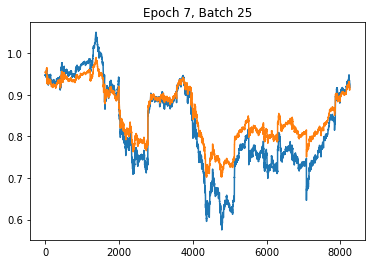

Epoch:7, Batch:26, MSE:0.000108935754
Epoch:7, Batch:27, MSE:5.8149846e-05
Epoch:7, Batch:28, MSE:8.020769e-05
Epoch:7, Batch:29, MSE:0.00018719192
Epoch:7, Batch:30, MSE:0.00026295148
(1, 8254)
(8254,)


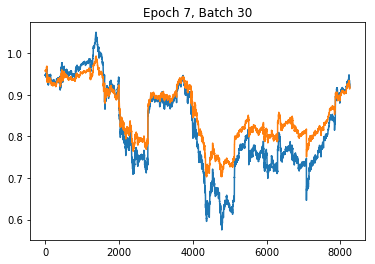

Epoch:7, Batch:31, MSE:0.00022791194
Epoch:7, Batch:32, MSE:0.0001065658
Epoch:7, Batch:33, MSE:5.4775926e-05
Epoch:7, Batch:34, MSE:6.3143685e-05
Epoch:7, Batch:35, MSE:0.00010791877
(1, 8254)
(8254,)


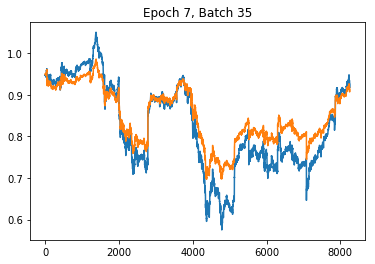

Epoch:7, Batch:36, MSE:0.00012043321
Epoch:7, Batch:37, MSE:0.00013725695
Epoch:7, Batch:38, MSE:0.00017984261
Epoch:7, Batch:39, MSE:0.00014366247
Epoch:7, Batch:40, MSE:7.622957e-05
(1, 8254)
(8254,)


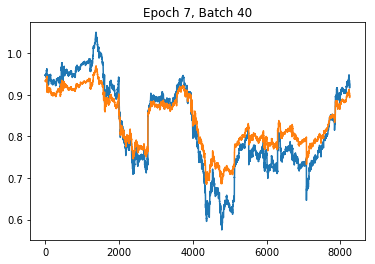

Epoch:7, Batch:41, MSE:4.991189e-05
Epoch:7, Batch:42, MSE:0.00016641471
Epoch:7, Batch:43, MSE:0.0004004642
Epoch:7, Batch:44, MSE:0.0006985508
Epoch:7, Batch:45, MSE:0.0007091303
(1, 8254)
(8254,)


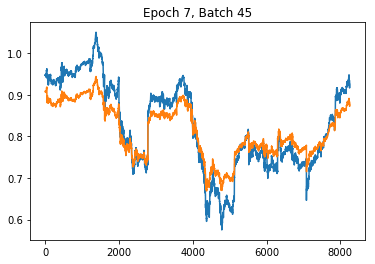

Epoch:7, Batch:46, MSE:0.00032410302
Epoch:7, Batch:47, MSE:6.079313e-05
Epoch:7, Batch:48, MSE:0.00018653266
Epoch:7, Batch:49, MSE:0.0005717714
Epoch:7, Batch:50, MSE:0.0006675095
(1, 8254)
(8254,)


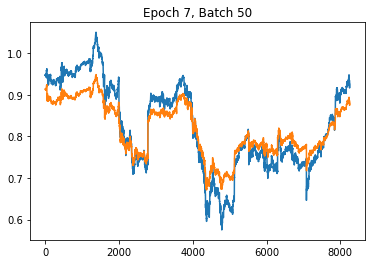

Epoch:7, Batch:51, MSE:0.00038987445
Epoch:7, Batch:52, MSE:0.0001236703
Epoch:7, Batch:53, MSE:7.309222e-05
Epoch:7, Batch:54, MSE:0.00021788973
Epoch:7, Batch:55, MSE:0.00023606903
(1, 8254)
(8254,)


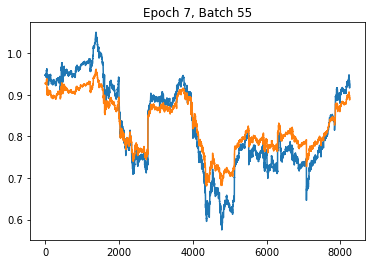

Epoch:7, Batch:56, MSE:0.0002019533
Epoch:7, Batch:57, MSE:0.00014778096
Epoch:7, Batch:58, MSE:8.041538e-05
Epoch:7, Batch:59, MSE:0.00023161946
Epoch:7, Batch:60, MSE:0.00028793426
(1, 8254)
(8254,)


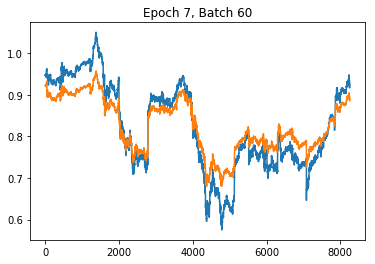

Epoch:7, Batch:61, MSE:0.0002099997
Epoch:7, Batch:62, MSE:6.301103e-05
Epoch:7, Batch:63, MSE:7.8914025e-05
Epoch:7, Batch:64, MSE:0.00016228057
Epoch:7, Batch:65, MSE:0.00020427234
(1, 8254)
(8254,)


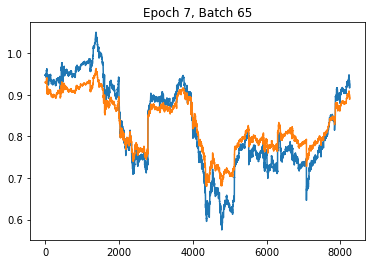

Epoch:7, Batch:66, MSE:0.00023047374
Epoch:7, Batch:67, MSE:0.00014641118
Epoch:7, Batch:68, MSE:7.463612e-05
Epoch:7, Batch:69, MSE:6.1197396e-05
Epoch:7, Batch:70, MSE:0.00014338247
(1, 8254)
(8254,)


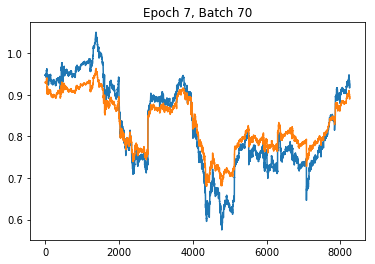

Epoch:7, Batch:71, MSE:0.0002672925
Epoch:7, Batch:72, MSE:0.00023160432
Epoch:7, Batch:73, MSE:0.00016549171
Epoch:7, Batch:74, MSE:0.000104540646
Epoch:7, Batch:75, MSE:7.8763864e-05
(1, 8254)
(8254,)


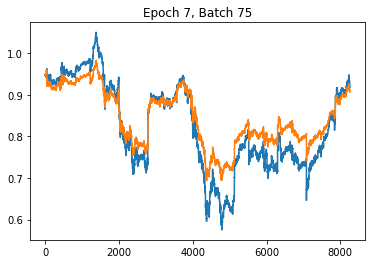

Epoch:7, Batch:76, MSE:6.308765e-05
Epoch:7, Batch:77, MSE:0.00014285676
Epoch:7, Batch:78, MSE:0.0002942282
Epoch:7, Batch:79, MSE:0.00035823096
Epoch:7, Batch:80, MSE:0.00019198214
(1, 8254)
(8254,)


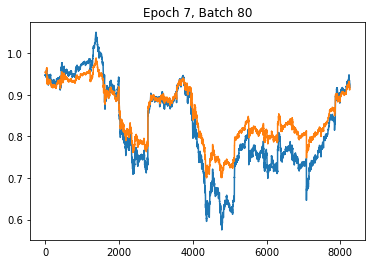

Epoch:7, Batch:81, MSE:6.496019e-05
Epoch:7, Batch:82, MSE:6.034138e-05
Epoch:7, Batch:83, MSE:8.7850225e-05
Epoch:7, Batch:84, MSE:0.00018918475
Epoch:7, Batch:85, MSE:0.0001725604
(1, 8254)
(8254,)


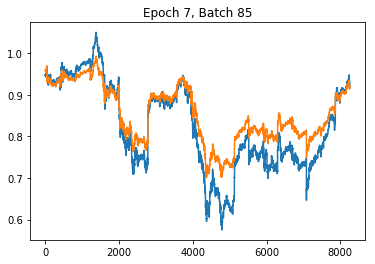

Epoch:7, Batch:86, MSE:0.00011825097
Epoch:7, Batch:87, MSE:6.731576e-05
Epoch:7, Batch:88, MSE:5.255849e-05
Epoch:7, Batch:89, MSE:9.7897355e-05
Epoch:7, Batch:90, MSE:0.00014634005
(1, 8254)
(8254,)


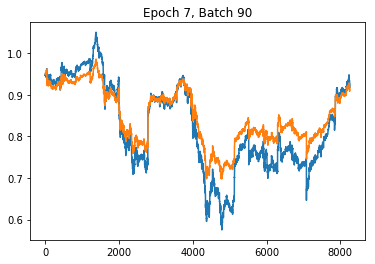

Epoch:7, Batch:91, MSE:0.00013498311
Epoch:7, Batch:92, MSE:9.7517295e-05
Epoch:7, Batch:93, MSE:5.8475587e-05
Epoch:7, Batch:94, MSE:8.762611e-05
Epoch:7, Batch:95, MSE:0.00012123406
(1, 8254)
(8254,)


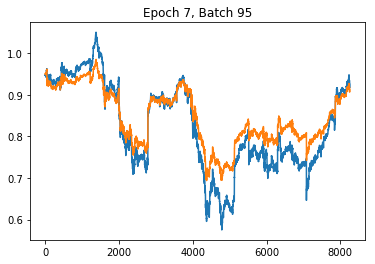

Epoch:7, Batch:96, MSE:8.410672e-05
Epoch:7, Batch:97, MSE:4.3750617e-05
Epoch:7, Batch:98, MSE:9.905256e-05
Epoch:7, Batch:99, MSE:0.00017457304
Epoch:7, Batch:100, MSE:0.00011723449
(1, 8254)
(8254,)


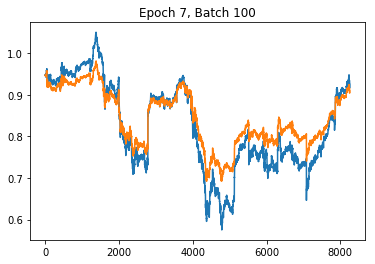

Epoch:7, Batch:101, MSE:6.857663e-05
Epoch:7, Batch:102, MSE:4.895669e-05
Epoch:7, Batch:103, MSE:6.3292755e-05
Epoch:7, Batch:104, MSE:7.4062875e-05
Epoch:7, Batch:105, MSE:7.070185e-05
(1, 8254)
(8254,)


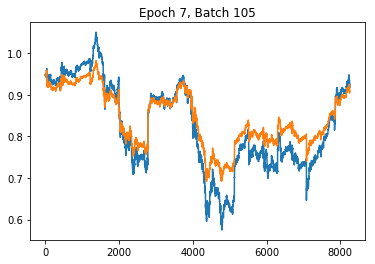

Epoch:7, Batch:106, MSE:7.2978786e-05
Epoch:7, Batch:107, MSE:8.584061e-05
Epoch:7, Batch:108, MSE:6.866545e-05
Epoch:7, Batch:109, MSE:5.4304954e-05
Epoch:7, Batch:110, MSE:5.2026986e-05
(1, 8254)
(8254,)


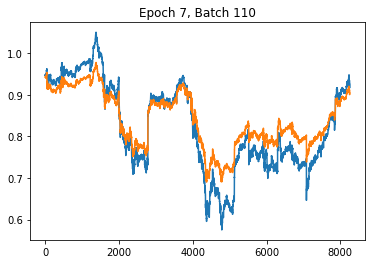

Epoch:7, Batch:111, MSE:4.8208974e-05
Epoch:7, Batch:112, MSE:4.6378686e-05
Epoch:7, Batch:113, MSE:5.1208648e-05
Epoch:7, Batch:114, MSE:4.7604553e-05
Epoch:7, Batch:115, MSE:6.1367355e-05
(1, 8254)
(8254,)


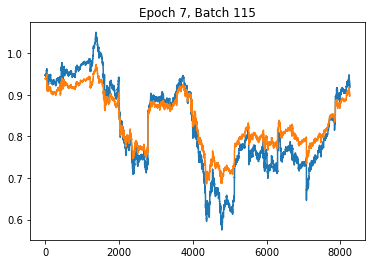

Epoch:7, Batch:116, MSE:5.4826865e-05
Epoch:7, Batch:117, MSE:4.9994058e-05
Epoch:7, Batch:118, MSE:5.1934054e-05
Epoch:7, Batch:119, MSE:5.0844654e-05
Epoch:7, Batch:120, MSE:4.8826536e-05
(1, 8254)
(8254,)


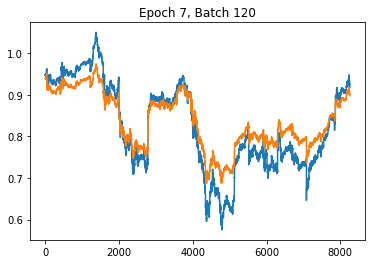

Epoch:7, Batch:121, MSE:4.6465455e-05
Epoch:7, Batch:122, MSE:5.9629267e-05
Epoch:7, Batch:123, MSE:8.1267266e-05
Epoch:7, Batch:124, MSE:9.9951605e-05
Epoch:7, Batch:125, MSE:0.00013335915
(1, 8254)
(8254,)


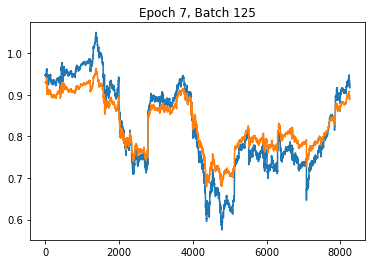

Epoch:7, Batch:126, MSE:0.00014058604
Epoch:7, Batch:127, MSE:0.0001221223
Epoch:8, Batch:0, MSE:0.00011135441
(1, 8254)
(8254,)


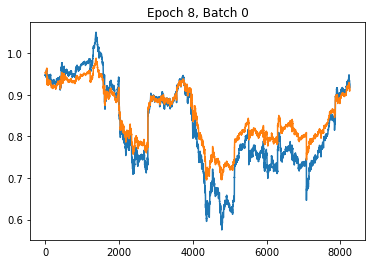

Epoch:8, Batch:1, MSE:4.4755237e-05
Epoch:8, Batch:2, MSE:6.059205e-05
Epoch:8, Batch:3, MSE:0.00013351941
Epoch:8, Batch:4, MSE:0.0002050908
Epoch:8, Batch:5, MSE:0.00028917173
(1, 8254)
(8254,)


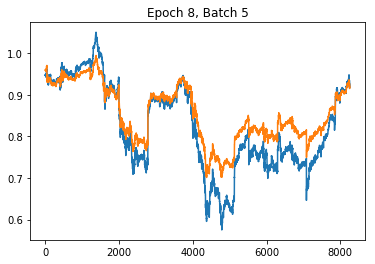

Epoch:8, Batch:6, MSE:0.00016742732
Epoch:8, Batch:7, MSE:6.023768e-05
Epoch:8, Batch:8, MSE:6.0164264e-05
Epoch:8, Batch:9, MSE:6.31857e-05
Epoch:8, Batch:10, MSE:0.00019748621
(1, 8254)
(8254,)


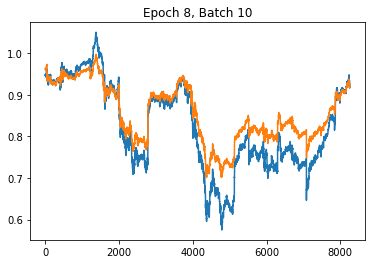

Epoch:8, Batch:11, MSE:0.00032909802
Epoch:8, Batch:12, MSE:0.00031900418
Epoch:8, Batch:13, MSE:0.00019626232
Epoch:8, Batch:14, MSE:7.211964e-05
Epoch:8, Batch:15, MSE:8.229869e-05
(1, 8254)
(8254,)


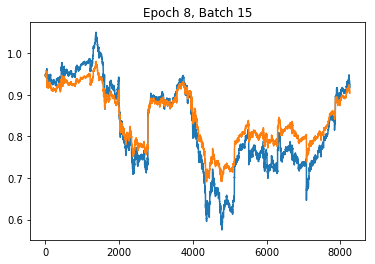

Epoch:8, Batch:16, MSE:0.0001110865
Epoch:8, Batch:17, MSE:0.00019284163
Epoch:8, Batch:18, MSE:0.0002873947
Epoch:8, Batch:19, MSE:0.00014845026
Epoch:8, Batch:20, MSE:0.000114019625
(1, 8254)
(8254,)


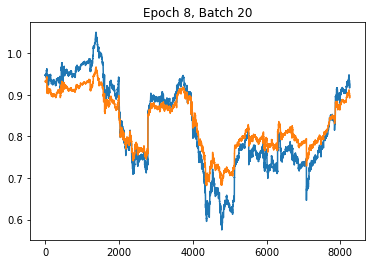

Epoch:8, Batch:21, MSE:0.00011027419
Epoch:8, Batch:22, MSE:6.81883e-05
Epoch:8, Batch:23, MSE:6.1241786e-05
Epoch:8, Batch:24, MSE:4.979918e-05
Epoch:8, Batch:25, MSE:7.0387614e-05
(1, 8254)
(8254,)


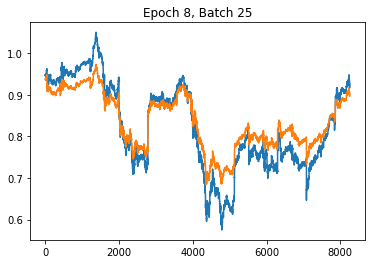

Epoch:8, Batch:26, MSE:9.3786024e-05
Epoch:8, Batch:27, MSE:0.00017059201
Epoch:8, Batch:28, MSE:0.0001154766
Epoch:8, Batch:29, MSE:5.0644016e-05
Epoch:8, Batch:30, MSE:5.9155966e-05
(1, 8254)
(8254,)


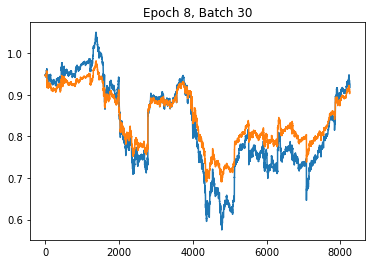

Epoch:8, Batch:31, MSE:4.8139264e-05
Epoch:8, Batch:32, MSE:5.6601777e-05
Epoch:8, Batch:33, MSE:5.01326e-05
Epoch:8, Batch:34, MSE:4.0700943e-05
Epoch:8, Batch:35, MSE:5.0195908e-05
(1, 8254)
(8254,)


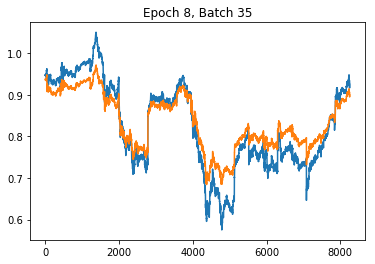

Epoch:8, Batch:36, MSE:4.5678593e-05
Epoch:8, Batch:37, MSE:4.2476007e-05
Epoch:8, Batch:38, MSE:4.3954242e-05
Epoch:8, Batch:39, MSE:5.071328e-05
Epoch:8, Batch:40, MSE:5.3907865e-05
(1, 8254)
(8254,)


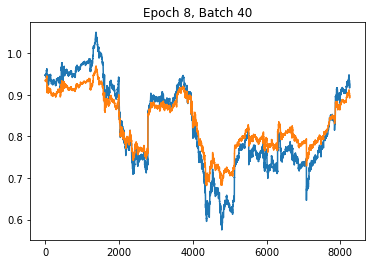

Epoch:8, Batch:41, MSE:8.2070044e-05
Epoch:8, Batch:42, MSE:0.00010162573
Epoch:8, Batch:43, MSE:0.00013416211
Epoch:8, Batch:44, MSE:0.000107396874
Epoch:8, Batch:45, MSE:7.07351e-05
(1, 8254)
(8254,)


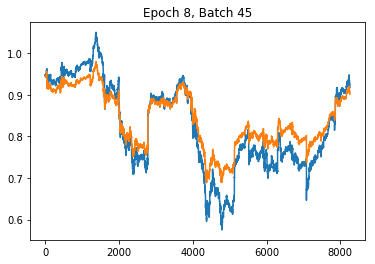

Epoch:8, Batch:46, MSE:5.4295844e-05
Epoch:8, Batch:47, MSE:4.2820902e-05
Epoch:8, Batch:48, MSE:8.092877e-05
Epoch:8, Batch:49, MSE:0.00011760228
Epoch:8, Batch:50, MSE:0.00019651608
(1, 8254)
(8254,)


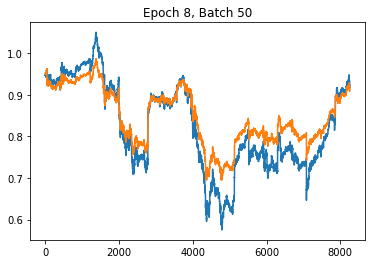

Epoch:8, Batch:51, MSE:0.00020673856
Epoch:8, Batch:52, MSE:0.00027886662
Epoch:8, Batch:53, MSE:0.0002689545
Epoch:8, Batch:54, MSE:0.00017742364
Epoch:8, Batch:55, MSE:9.8855795e-05
(1, 8254)
(8254,)


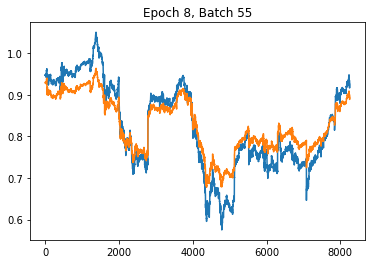

Epoch:8, Batch:56, MSE:6.5677494e-05
Epoch:8, Batch:57, MSE:6.23236e-05
Epoch:8, Batch:58, MSE:0.00012906882
Epoch:8, Batch:59, MSE:0.00021361234
Epoch:8, Batch:60, MSE:0.00019452153
(1, 8254)
(8254,)


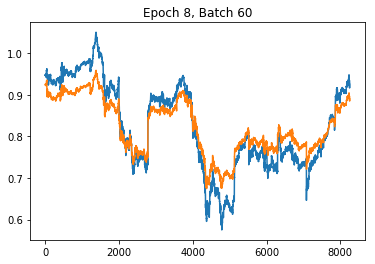

Epoch:8, Batch:61, MSE:0.00019420224
Epoch:8, Batch:62, MSE:0.00021962923
Epoch:8, Batch:63, MSE:0.00018176377
Epoch:8, Batch:64, MSE:0.00010819603
Epoch:8, Batch:65, MSE:4.637274e-05
(1, 8254)
(8254,)


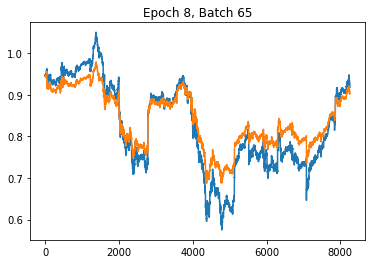

Epoch:8, Batch:66, MSE:6.334119e-05
Epoch:8, Batch:67, MSE:0.00012569761
Epoch:8, Batch:68, MSE:0.00020487804
Epoch:8, Batch:69, MSE:0.00017220083
Epoch:8, Batch:70, MSE:0.00012887163
(1, 8254)
(8254,)


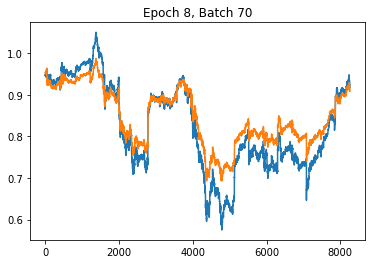

Epoch:8, Batch:71, MSE:0.00013061595
Epoch:8, Batch:72, MSE:0.00011425961
Epoch:8, Batch:73, MSE:0.00012825502
Epoch:8, Batch:74, MSE:0.00016353036
Epoch:8, Batch:75, MSE:0.00018425868
(1, 8254)
(8254,)


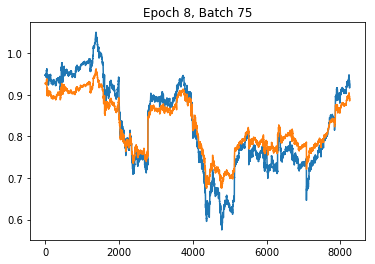

Epoch:8, Batch:76, MSE:0.00012877969
Epoch:8, Batch:77, MSE:0.0001555698
Epoch:8, Batch:78, MSE:0.000113752176
Epoch:8, Batch:79, MSE:7.199464e-05
Epoch:8, Batch:80, MSE:4.9873008e-05
(1, 8254)
(8254,)


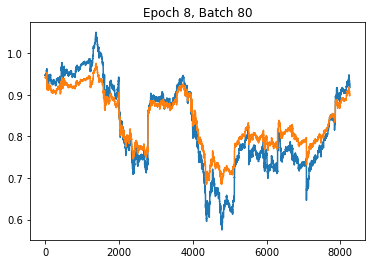

Epoch:8, Batch:81, MSE:6.7066285e-05
Epoch:8, Batch:82, MSE:0.00016163278
Epoch:8, Batch:83, MSE:0.00022829365
Epoch:8, Batch:84, MSE:0.00029050992
Epoch:8, Batch:85, MSE:0.0002869874
(1, 8254)
(8254,)


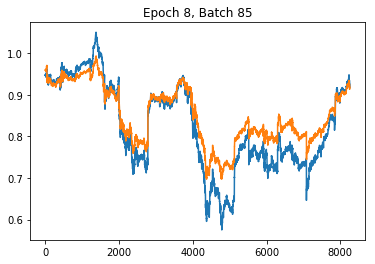

Epoch:8, Batch:86, MSE:0.0001984465
Epoch:8, Batch:87, MSE:9.267865e-05
Epoch:8, Batch:88, MSE:4.81842e-05
Epoch:8, Batch:89, MSE:5.8068654e-05
Epoch:8, Batch:90, MSE:0.0001213189
(1, 8254)
(8254,)


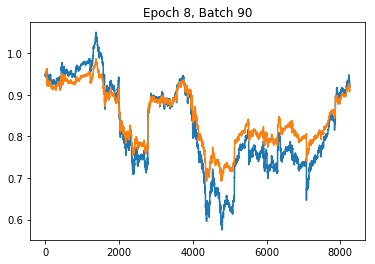

Epoch:8, Batch:91, MSE:0.00021655986
Epoch:8, Batch:92, MSE:0.0002652299
Epoch:8, Batch:93, MSE:0.0002303454
Epoch:8, Batch:94, MSE:0.000129406
Epoch:8, Batch:95, MSE:7.709614e-05
(1, 8254)
(8254,)


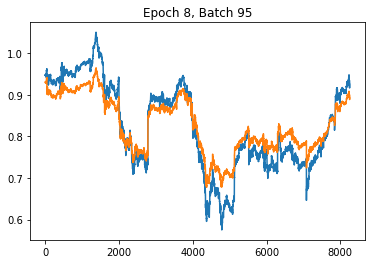

Epoch:8, Batch:96, MSE:4.4713535e-05
Epoch:8, Batch:97, MSE:9.152463e-05
Epoch:8, Batch:98, MSE:0.00013856542
Epoch:8, Batch:99, MSE:6.916996e-05
Epoch:8, Batch:100, MSE:5.1115956e-05
(1, 8254)
(8254,)


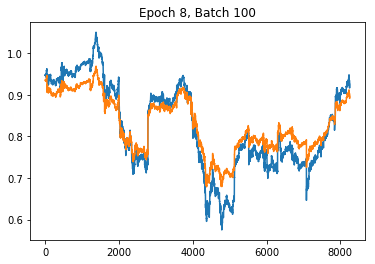

Epoch:8, Batch:101, MSE:4.626436e-05
Epoch:8, Batch:102, MSE:9.4025956e-05
Epoch:8, Batch:103, MSE:8.4937914e-05
Epoch:8, Batch:104, MSE:8.264711e-05
Epoch:8, Batch:105, MSE:7.096778e-05
(1, 8254)
(8254,)


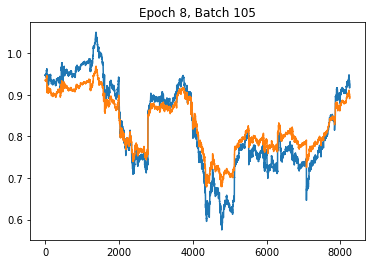

Epoch:8, Batch:106, MSE:4.8922713e-05
Epoch:8, Batch:107, MSE:4.5166104e-05
Epoch:8, Batch:108, MSE:4.2721535e-05
Epoch:8, Batch:109, MSE:6.239478e-05
Epoch:8, Batch:110, MSE:0.00011421705
(1, 8254)
(8254,)


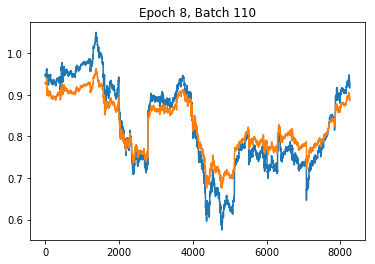

Epoch:8, Batch:111, MSE:0.00013780671
Epoch:8, Batch:112, MSE:0.00011679662
Epoch:8, Batch:113, MSE:9.330285e-05
Epoch:8, Batch:114, MSE:0.00012491795
Epoch:8, Batch:115, MSE:0.00020004212
(1, 8254)
(8254,)


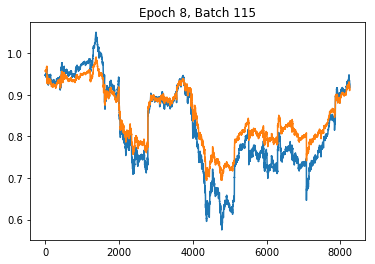

Epoch:8, Batch:116, MSE:0.0002692924
Epoch:8, Batch:117, MSE:0.00022252255
Epoch:8, Batch:118, MSE:0.00012164218
Epoch:8, Batch:119, MSE:5.4022283e-05
Epoch:8, Batch:120, MSE:5.8865535e-05
(1, 8254)
(8254,)


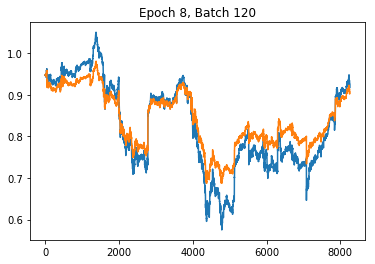

Epoch:8, Batch:121, MSE:0.00016688861
Epoch:8, Batch:122, MSE:0.00023654828
Epoch:8, Batch:123, MSE:0.00022467914
Epoch:8, Batch:124, MSE:0.00021072548
Epoch:8, Batch:125, MSE:0.00017233656
(1, 8254)
(8254,)


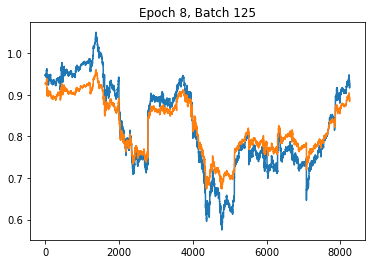

Epoch:8, Batch:126, MSE:0.000116451316
Epoch:8, Batch:127, MSE:5.691193e-05
Epoch:9, Batch:0, MSE:7.100884e-05
(1, 8254)
(8254,)


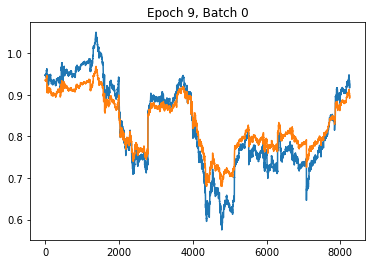

Epoch:9, Batch:1, MSE:0.00023501841
Epoch:9, Batch:2, MSE:0.0003513779
Epoch:9, Batch:3, MSE:0.0003090719
Epoch:9, Batch:4, MSE:0.00017736873
Epoch:9, Batch:5, MSE:6.659932e-05
(1, 8254)
(8254,)


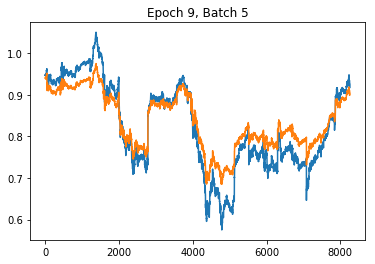

Epoch:9, Batch:6, MSE:6.984535e-05
Epoch:9, Batch:7, MSE:0.00023062446
Epoch:9, Batch:8, MSE:0.00030801122
Epoch:9, Batch:9, MSE:0.0002482827
Epoch:9, Batch:10, MSE:6.9702e-05
(1, 8254)
(8254,)


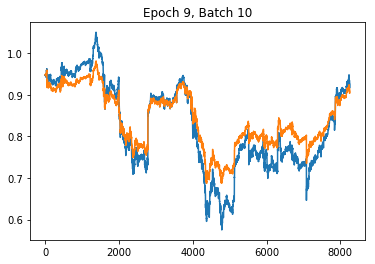

Epoch:9, Batch:11, MSE:0.00011951749
Epoch:9, Batch:12, MSE:0.00044617645
Epoch:9, Batch:13, MSE:0.0005549717
Epoch:9, Batch:14, MSE:0.0006188225
Epoch:9, Batch:15, MSE:0.0004967055
(1, 8254)
(8254,)


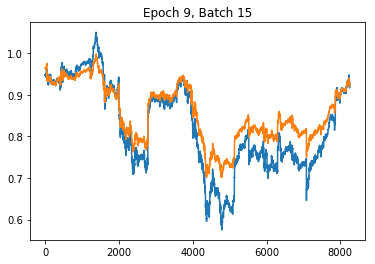

Epoch:9, Batch:16, MSE:0.00041313824
Epoch:9, Batch:17, MSE:0.00011604139
Epoch:9, Batch:18, MSE:9.742634e-05
Epoch:9, Batch:19, MSE:0.00041441922
Epoch:9, Batch:20, MSE:0.00064543716
(1, 8254)
(8254,)


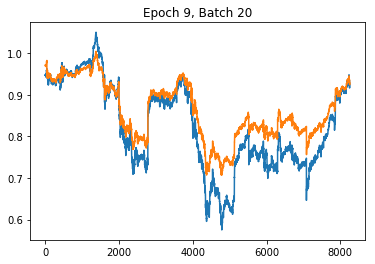

Epoch:9, Batch:21, MSE:0.0006556047
Epoch:9, Batch:22, MSE:0.00029171217
Epoch:9, Batch:23, MSE:7.078193e-05
Epoch:9, Batch:24, MSE:0.00018301098
Epoch:9, Batch:25, MSE:0.00032463897
(1, 8254)
(8254,)


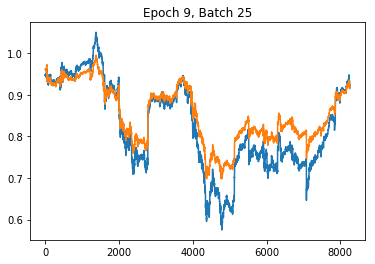

Epoch:9, Batch:26, MSE:0.00027247332
Epoch:9, Batch:27, MSE:0.00011017063
Epoch:9, Batch:28, MSE:6.4533946e-05
Epoch:9, Batch:29, MSE:0.00011089539
Epoch:9, Batch:30, MSE:0.00014003305
(1, 8254)
(8254,)


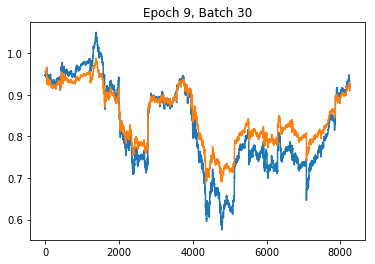

Epoch:9, Batch:31, MSE:0.00015928438
Epoch:9, Batch:32, MSE:8.951411e-05
Epoch:9, Batch:33, MSE:6.2498904e-05
Epoch:9, Batch:34, MSE:0.00018468729
Epoch:9, Batch:35, MSE:0.00033305524
(1, 8254)
(8254,)


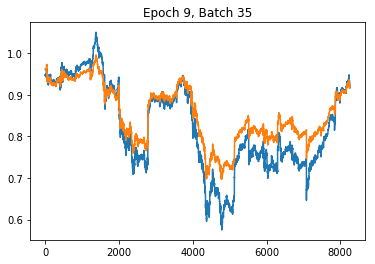

Epoch:9, Batch:36, MSE:0.0003102904
Epoch:9, Batch:37, MSE:0.00017630585
Epoch:9, Batch:38, MSE:7.846323e-05
Epoch:9, Batch:39, MSE:5.265916e-05
Epoch:9, Batch:40, MSE:0.000107697684
(1, 8254)
(8254,)


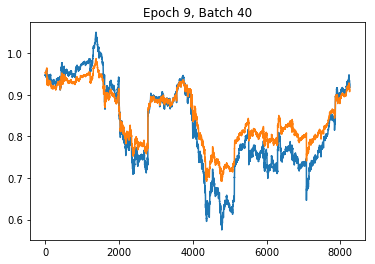

Epoch:9, Batch:41, MSE:0.00017098084
Epoch:9, Batch:42, MSE:0.00011997354
Epoch:9, Batch:43, MSE:6.522702e-05
Epoch:9, Batch:44, MSE:5.1946437e-05
Epoch:9, Batch:45, MSE:0.00010040979
(1, 8254)
(8254,)


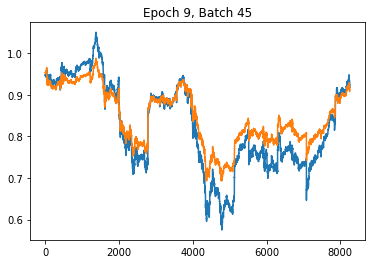

Epoch:9, Batch:46, MSE:0.00019211714
Epoch:9, Batch:47, MSE:0.00015814285
Epoch:9, Batch:48, MSE:7.553812e-05
Epoch:9, Batch:49, MSE:4.7543926e-05
Epoch:9, Batch:50, MSE:6.2194056e-05
(1, 8254)
(8254,)


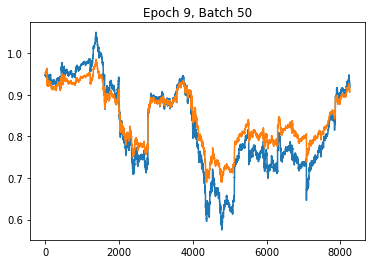

Epoch:9, Batch:51, MSE:5.2644875e-05
Epoch:9, Batch:52, MSE:6.642008e-05
Epoch:9, Batch:53, MSE:4.5893743e-05
Epoch:9, Batch:54, MSE:7.9968944e-05
Epoch:9, Batch:55, MSE:6.0043283e-05
(1, 8254)
(8254,)


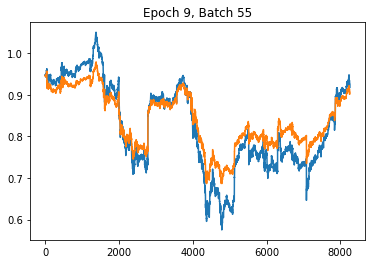

Epoch:9, Batch:56, MSE:5.932955e-05
Epoch:9, Batch:57, MSE:4.729423e-05
Epoch:9, Batch:58, MSE:5.1860297e-05
Epoch:9, Batch:59, MSE:9.637188e-05
Epoch:9, Batch:60, MSE:0.00013354799
(1, 8254)
(8254,)


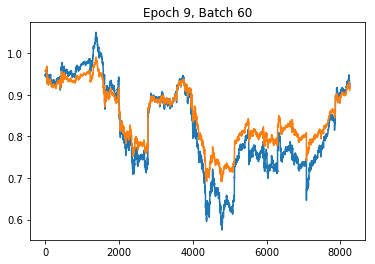

Epoch:9, Batch:61, MSE:0.00012207184
Epoch:9, Batch:62, MSE:7.7390025e-05
Epoch:9, Batch:63, MSE:4.581286e-05
Epoch:9, Batch:64, MSE:7.325236e-05
Epoch:9, Batch:65, MSE:0.000119311604
(1, 8254)
(8254,)


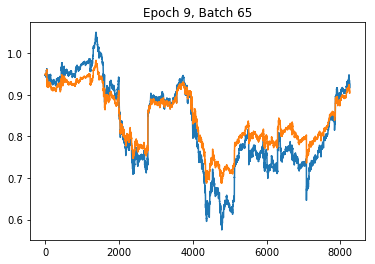

Epoch:9, Batch:66, MSE:0.00011979648
Epoch:9, Batch:67, MSE:6.911098e-05
Epoch:9, Batch:68, MSE:4.366794e-05
Epoch:9, Batch:69, MSE:5.1348296e-05
Epoch:9, Batch:70, MSE:5.8367288e-05
(1, 8254)
(8254,)


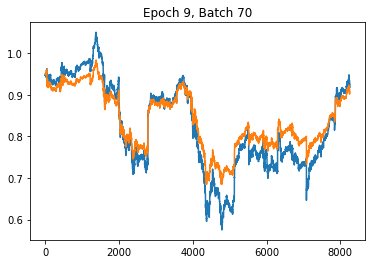

Epoch:9, Batch:71, MSE:5.2845546e-05
Epoch:9, Batch:72, MSE:5.14565e-05
Epoch:9, Batch:73, MSE:5.693611e-05
Epoch:9, Batch:74, MSE:5.1308743e-05
Epoch:9, Batch:75, MSE:4.833596e-05
(1, 8254)
(8254,)


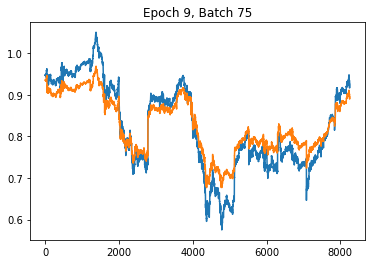

Epoch:9, Batch:76, MSE:4.4946813e-05
Epoch:9, Batch:77, MSE:5.648225e-05
Epoch:9, Batch:78, MSE:7.411928e-05
Epoch:9, Batch:79, MSE:7.895795e-05
Epoch:9, Batch:80, MSE:5.394408e-05
(1, 8254)
(8254,)


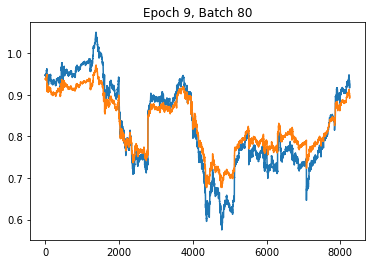

Epoch:9, Batch:81, MSE:4.239259e-05
Epoch:9, Batch:82, MSE:4.7387424e-05
Epoch:9, Batch:83, MSE:6.87851e-05
Epoch:9, Batch:84, MSE:8.2911225e-05
Epoch:9, Batch:85, MSE:6.671151e-05
(1, 8254)
(8254,)


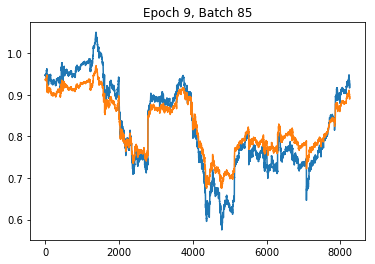

Epoch:9, Batch:86, MSE:5.1661293e-05
Epoch:9, Batch:87, MSE:4.287753e-05
Epoch:9, Batch:88, MSE:3.8217222e-05
Epoch:9, Batch:89, MSE:5.178064e-05
Epoch:9, Batch:90, MSE:8.133844e-05
(1, 8254)
(8254,)


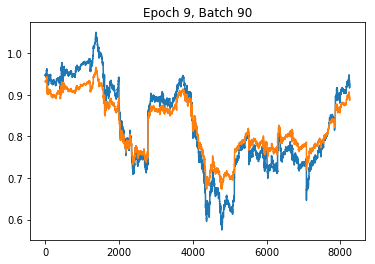

Epoch:9, Batch:91, MSE:0.00019633808
Epoch:9, Batch:92, MSE:0.0002552017
Epoch:9, Batch:93, MSE:0.00019859886
Epoch:9, Batch:94, MSE:0.00012390672
Epoch:9, Batch:95, MSE:7.215258e-05
(1, 8254)
(8254,)


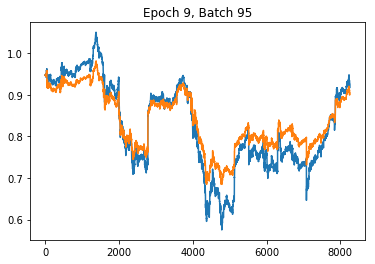

Epoch:9, Batch:96, MSE:5.6628658e-05
Epoch:9, Batch:97, MSE:3.5297504e-05
Epoch:9, Batch:98, MSE:5.2976888e-05
Epoch:9, Batch:99, MSE:4.5220717e-05
Epoch:9, Batch:100, MSE:3.391168e-05
(1, 8254)
(8254,)


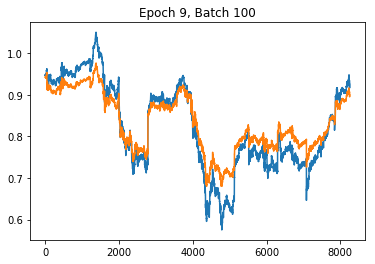

Epoch:9, Batch:101, MSE:5.2881278e-05
Epoch:9, Batch:102, MSE:6.663103e-05
Epoch:9, Batch:103, MSE:9.6575444e-05
Epoch:9, Batch:104, MSE:5.3419793e-05
Epoch:9, Batch:105, MSE:4.7374644e-05
(1, 8254)
(8254,)


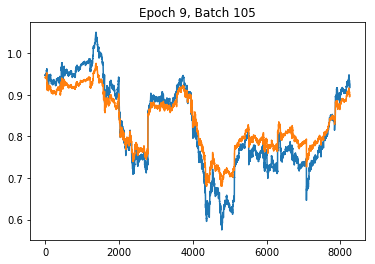

Epoch:9, Batch:106, MSE:4.937419e-05
Epoch:9, Batch:107, MSE:5.070169e-05
Epoch:9, Batch:108, MSE:7.095742e-05
Epoch:9, Batch:109, MSE:5.4541662e-05
Epoch:9, Batch:110, MSE:5.491958e-05
(1, 8254)
(8254,)


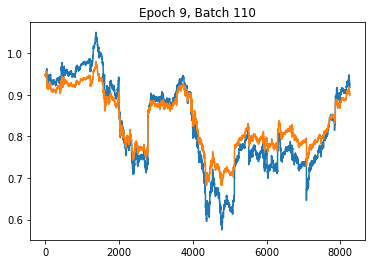

Epoch:9, Batch:111, MSE:5.022339e-05
Epoch:9, Batch:112, MSE:4.5115587e-05
Epoch:9, Batch:113, MSE:2.9284827e-05
Epoch:9, Batch:114, MSE:4.3450105e-05
Epoch:9, Batch:115, MSE:7.415584e-05
(1, 8254)
(8254,)


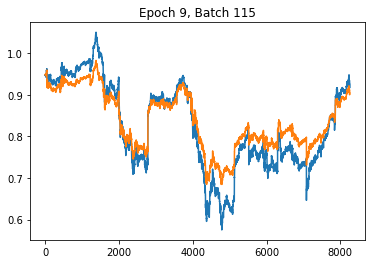

Epoch:9, Batch:116, MSE:9.031973e-05
Epoch:9, Batch:117, MSE:7.8722944e-05
Epoch:9, Batch:118, MSE:6.20474e-05
Epoch:9, Batch:119, MSE:3.9899656e-05
Epoch:9, Batch:120, MSE:4.2066953e-05
(1, 8254)
(8254,)


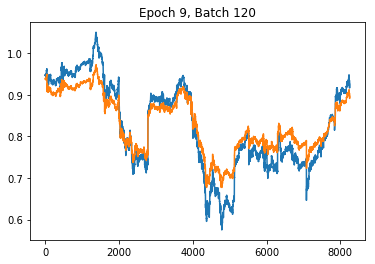

Epoch:9, Batch:121, MSE:3.091353e-05
Epoch:9, Batch:122, MSE:4.292396e-05
Epoch:9, Batch:123, MSE:8.297488e-05
Epoch:9, Batch:124, MSE:0.000120981815
Epoch:9, Batch:125, MSE:8.007363e-05
(1, 8254)
(8254,)


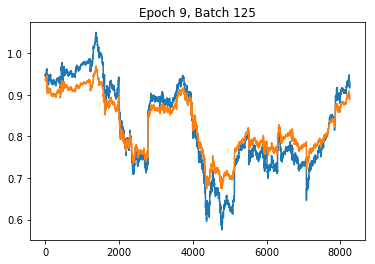

Epoch:9, Batch:126, MSE:6.708592e-05
Epoch:9, Batch:127, MSE:4.212223e-05


In [129]:
for e in range(epochs):
    #Shuffle training data
    shuffle_indices=np.random.permutation(np.arange(len(y_train)))
    #Using shuffle_indices variable we get the shuffled data. We should use the same variable to shuffle both X,y
    X_train=X_train[shuffle_indices] 
    y_train=y_train[shuffle_indices]
    
    #MiniBatch Training
    for i in range(0,len(y_train)//batch_size):
        start=i*batch_size
        batch_x=X_train[start:start+batch_size]
        batch_y=y_train[start:start+batch_size]
        
        #Run the optimizer
        net.run(opt, feed_dict={X:batch_x,Y:batch_y})
        mse_temp=net.run(mse, feed_dict={X:batch_x,Y:batch_y})
        print("Epoch:"+str(e)+", Batch:"+str(i)+', MSE:'+str(mse_temp))
        
        if(np.mod(i,5)==0):
            #Prediction on Test set
            pred=net.run(out,feed_dict={X:X_test})
            print(pred.shape)
            print(y_test.shape)
            plt.ion()
            fig=plt.figure()
            ax1=fig.add_subplot(111)
            line1=ax1.plot(y_test)
            line2=ax1.plot(pred.reshape(pred.shape[1]))
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.show()
        

In [83]:
# Print final MSE after Training using test data
mse_final=net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

0.0033518136


In [124]:
net.close()

In [118]:
pred.reshape(pred.shape[1]).shape

(8254,)

In [ ]:
        #Show Progress
        if(np.mod(i,5)==0):
            #Prediction
            pred=net.run(out,feed_dict={X:X_test})
            line2.set_ydata(pred)
            plt.title('Epoch'+str(e)+', Batch '+str(i))
            file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            plt.savefig(file_name)
            plt.pause(0.01)